# Data Exploration and plots of the results

## Data Exploration

In [1]:
from datasets import load_dataset

ds = load_dataset("coastalcph/lex_glue", "ledgar")

/Users/huggingfaceit/code/lextral/backend/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
print(ds["train"][0]['text'])

Except as otherwise set forth in this Debenture, the Company, for itself and its legal representatives, successors and assigns, expressly waives presentment, protest, demand, notice of dishonor, notice of nonpayment, notice of maturity, notice of protest, presentment for the purpose of accelerating maturity, and diligence in collection.


In [3]:
print(ds["train"][0]['label'])

97


In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})

In [5]:
label_names = ds["train"].features["label"].names
len(label_names)

100

In [ ]:
from collections import Counter

label_counts = Counter(ds["train"]["label"])
print(label_counts)

Counter({47: 3167, 65: 2493, 26: 2427, 38: 2340, 79: 1808, 85: 1469, 2: 1467, 7: 1327, 41: 1224, 89: 1166, 88: 1112, 51: 1104, 87: 1089, 58: 1034, 20: 1012, 45: 1009, 46: 976, 19: 960, 49: 936, 97: 878, 92: 866, 68: 856, 96: 768, 61: 741, 43: 677, 75: 664, 11: 656, 74: 621, 10: 620, 31: 590, 13: 588, 48: 587, 42: 578, 76: 569, 29: 566, 83: 563, 9: 549, 18: 541, 99: 517, 98: 499, 59: 479, 53: 473, 24: 469, 33: 462, 67: 459, 95: 451, 63: 445, 84: 444, 22: 444, 16: 434, 80: 419, 66: 409, 23: 406, 12: 397, 15: 389, 55: 386, 6: 385, 86: 380, 54: 366, 64: 363, 28: 354, 32: 354, 91: 353, 4: 352, 17: 349, 71: 345, 93: 341, 62: 327, 77: 327, 81: 326, 0: 326, 39: 324, 73: 323, 90: 317, 57: 313, 35: 308, 52: 304, 44: 300, 27: 278, 50: 271, 30: 263, 40: 258, 60: 255, 1: 252, 36: 244, 82: 238, 34: 229, 56: 202, 37: 201, 69: 190, 5: 178, 21: 175, 25: 168, 94: 131, 70: 125, 78: 118, 3: 106, 72: 47, 8: 31, 14: 23})


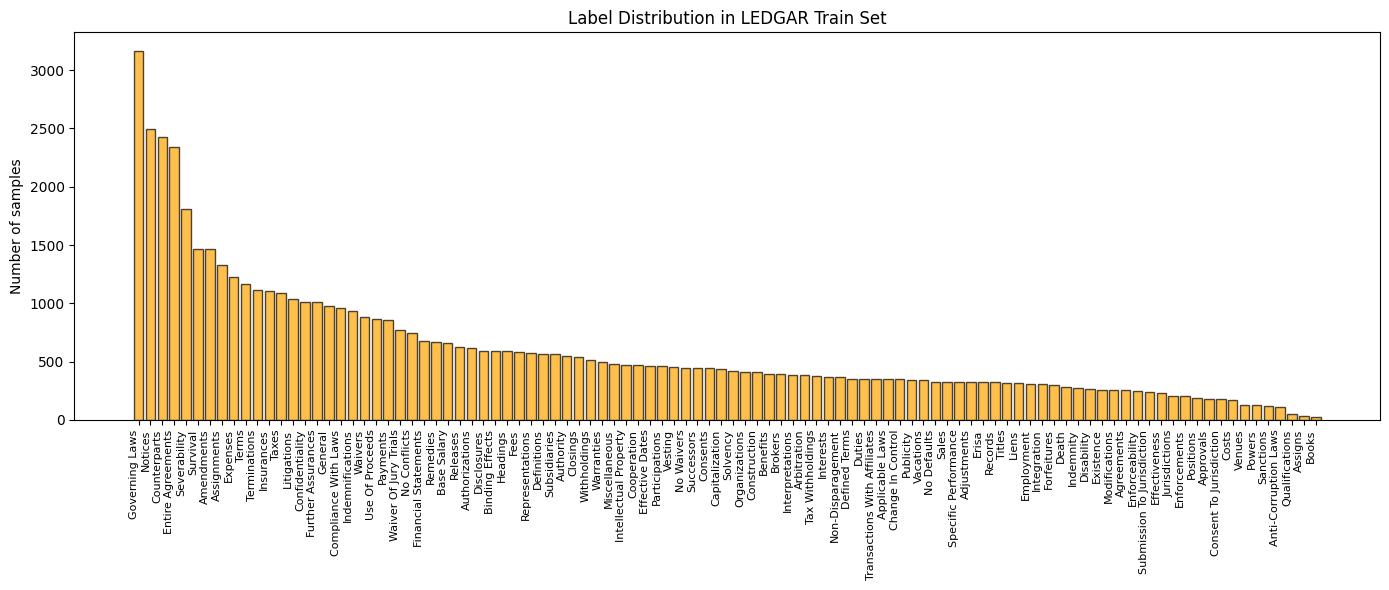

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset

ds = load_dataset("lex_glue", "ledgar")
label_counts = Counter(ds["train"]["label"])

label_names = ds["train"].features["label"].names
labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]
names = [label_names[label] for label in labels]

sorted_data = sorted(zip(names, counts), key=lambda x: x[1], reverse=True)
sorted_names, sorted_counts = zip(*sorted_data)

plt.figure(figsize=(14, 6))
bars = plt.bar(sorted_names, sorted_counts, color='orange', edgecolor='black', alpha=0.7)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.ylabel("Number of samples")
plt.title("Label Distribution in LEDGAR Train Set")
plt.tight_layout()
plt.savefig("../images/label_distribution_ledgar.png", dpi=300)
plt.show()


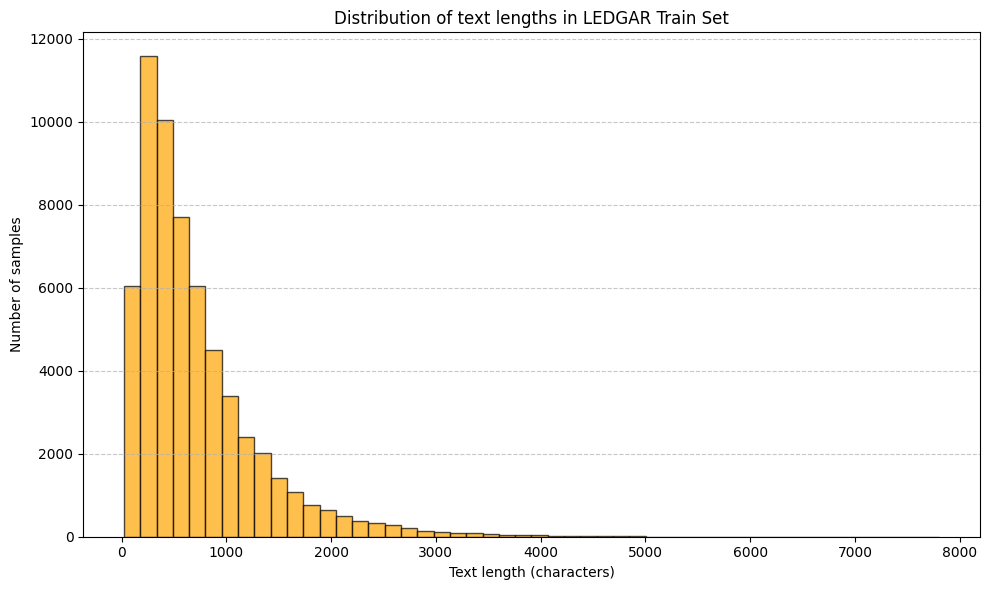

In [11]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# Charger le dataset
ds = load_dataset("lex_glue", "ledgar")

# Calculer la longueur des textes en nombre de caractères
text_lengths = [len(t) for t in ds["train"]["text"]]

# Plot histogramme
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel("Text length (characters)")
plt.ylabel("Number of samples")
plt.title("Distribution of text lengths in LEDGAR Train Set")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("../images/text_length_distribution_ledgar.png", dpi=300)
plt.show()


True
True
Connecting to PostgreSQL at localhost:5433/lextral-db as postgres
Loaded embeddings: (1000, 1024)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.264481
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.393417
[t-SNE] KL divergence after 1000 iterations: 0.937205


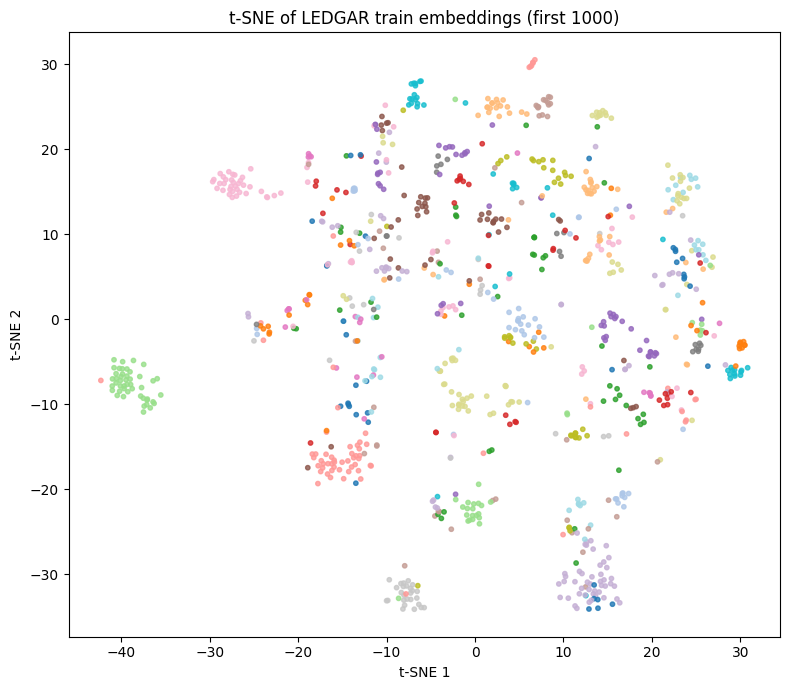

In [ ]:
import os
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pgvector.psycopg2 import register_vector
from dotenv import load_dotenv
print(load_dotenv("../.env"))
print(load_dotenv("../secrets.env"))

PG_HOST = os.getenv("DB_HOST", "127.0.0.1")
PG_PORT = "5433"
PG_DB   = os.getenv("DB_NAME", "lextral-db")
PG_USER = os.getenv("DB_USER", "postgres")
PG_PASS = os.getenv("DB_PASSWORD", "")

print(f"Connecting to PostgreSQL at {PG_HOST}:{PG_PORT}/{PG_DB} as {PG_USER}")
conn = psycopg2.connect(
    host=PG_HOST, port=PG_PORT, dbname=PG_DB, user=PG_USER, password=PG_PASS
)
register_vector(conn)

query = """
SELECT id, label_id, label_text, text, embedding
FROM clause_embeddings
WHERE split = 'train'
ORDER BY id
LIMIT 1000;
"""

with conn.cursor() as cur:
    cur.execute(query)
    rows = cur.fetchall()

conn.close()

# rows[i] = (id, label_id, label_text, text, embedding)
ids        = [r[0] for r in rows]
label_ids  = np.array([r[1] for r in rows], dtype=int)
label_text = [r[2] for r in rows]
texts      = [r[3] for r in rows]

X = np.vstack([np.array(r[4], dtype=np.float32) for r in rows])  # (N, 1024)

print(f"Loaded embeddings: {X.shape}")

pca_n = min(50, X.shape[1])
X_pca = PCA(n_components=pca_n, random_state=42).fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=30,
    metric="cosine",
    init="pca",
    learning_rate="auto",
    n_iter_without_progress=2000,
    random_state=42,
    verbose=1,
)
Y = tsne.fit_transform(X_pca)   # (N, 2)

plt.figure(figsize=(8, 7))
sc = plt.scatter(Y[:, 0], Y[:, 1], c=label_ids, cmap="tab20", s=10, alpha=0.8)
plt.title("t-SNE of LEDGAR train embeddings (first 1000)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.savefig("../images/tsne_ledgar_train_1k.png", dpi=300)
plt.show()


True
True
Connecting to PostgreSQL at localhost:5433/lextral-db as postgres
Loaded embeddings: (6000, 1024)
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.000s...
[t-SNE] Computed neighbors for 6000 samples in 0.475s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.126337
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.851120
[t-SNE] KL divergence after 1000 iterations: 0.987610


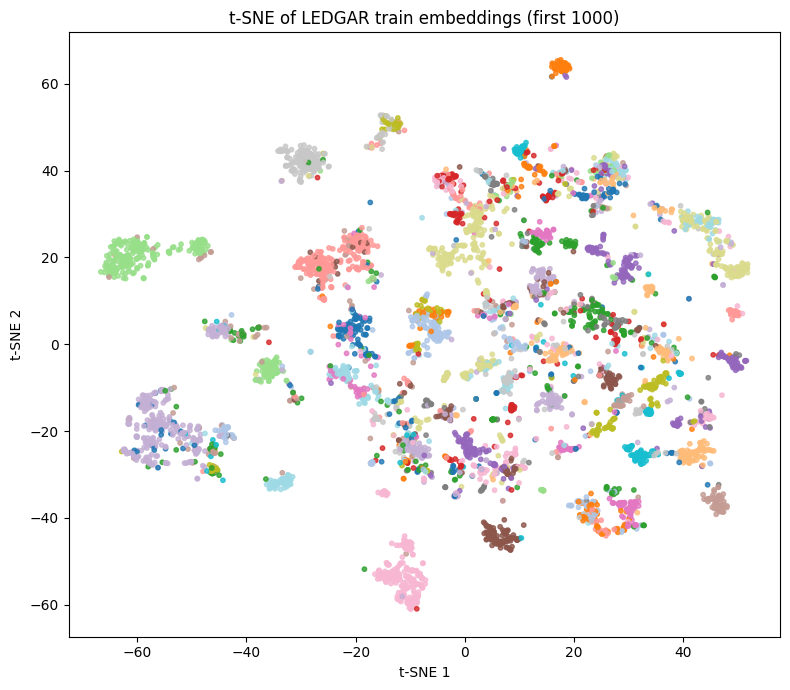

In [ ]:
import os
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pgvector.psycopg2 import register_vector
from dotenv import load_dotenv
print(load_dotenv("../.env"))
print(load_dotenv("../secrets.env"))

PG_HOST = os.getenv("DB_HOST", "127.0.0.1")
PG_PORT = "5433"
PG_DB   = os.getenv("DB_NAME", "lextral-db")
PG_USER = os.getenv("DB_USER", "postgres")
PG_PASS = os.getenv("DB_PASSWORD", "")

print(f"Connecting to PostgreSQL at {PG_HOST}:{PG_PORT}/{PG_DB} as {PG_USER}")
conn = psycopg2.connect(
    host=PG_HOST, port=PG_PORT, dbname=PG_DB, user=PG_USER, password=PG_PASS
)
register_vector(conn)

query = """
SELECT id, label_id, label_text, text, embedding
FROM clause_embeddings
WHERE split = 'train'
ORDER BY id
LIMIT 6000;
"""

with conn.cursor() as cur:
    cur.execute(query)
    rows = cur.fetchall()

conn.close()

# rows[i] = (id, label_id, label_text, text, embedding)
ids        = [r[0] for r in rows]
label_ids  = np.array([r[1] for r in rows], dtype=int)
label_text = [r[2] for r in rows]
texts      = [r[3] for r in rows]

X = np.vstack([np.array(r[4], dtype=np.float32) for r in rows])  # (N, 1024)

print(f"Loaded embeddings: {X.shape}")

pca_n = min(50, X.shape[1])
X_pca = PCA(n_components=pca_n, random_state=42).fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=50,
    metric="cosine",
    init="pca",
    learning_rate="auto",
    n_iter_without_progress=2000,
    random_state=42,
    verbose=1,
)
Y = tsne.fit_transform(X_pca)   # (N, 2)

plt.figure(figsize=(8, 7))
sc = plt.scatter(Y[:, 0], Y[:, 1], c=label_ids, cmap="tab20", s=10, alpha=0.8)
plt.title("t-SNE of LEDGAR train embeddings (first 1000)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.savefig("../images/tsne_ledgar_train_6k.png", dpi=300)
plt.show()


## Plots of the results

In [6]:
import json
from sklearn.metrics import classification_report

files = ["../data/evaluations/ministral-3b-latest_rag_1000.json", "../data/evaluations/ministral-3b-latest_rag_1000bis.json"]

y_true_all = []
y_pred_all = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        y_true_all.extend(data["y_true"])
        y_pred_all.extend(data["y_pred"])

print(classification_report(y_true_all, y_pred_all))


ValueError: Found input variables with inconsistent numbers of samples: [1000, 999]

Macro F1       : 0.7013
Weighted F1    : 0.8071
Macro Precision: 0.7177
Macro Recall   : 0.7111


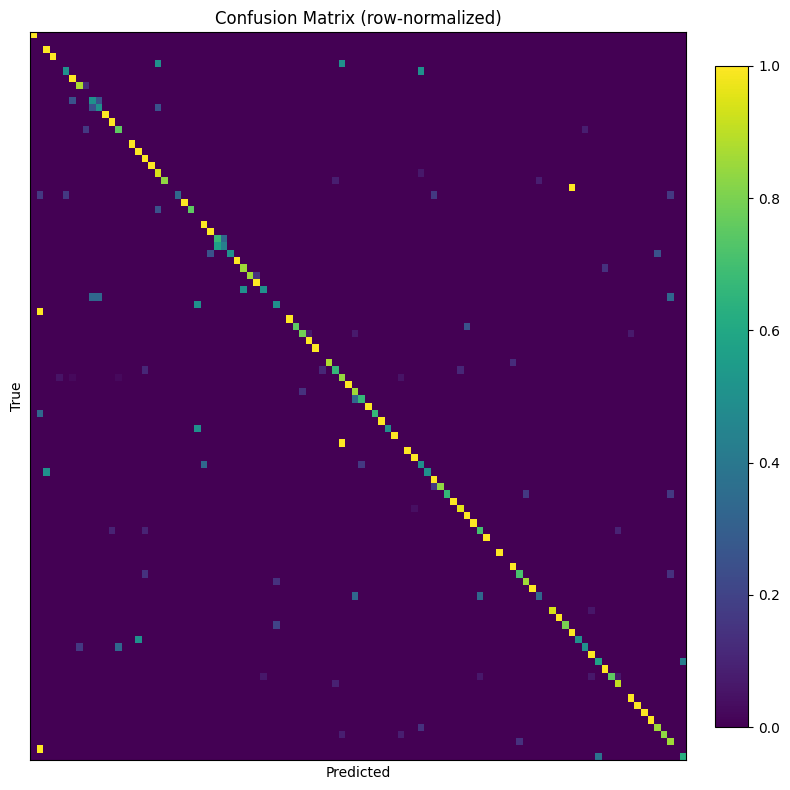

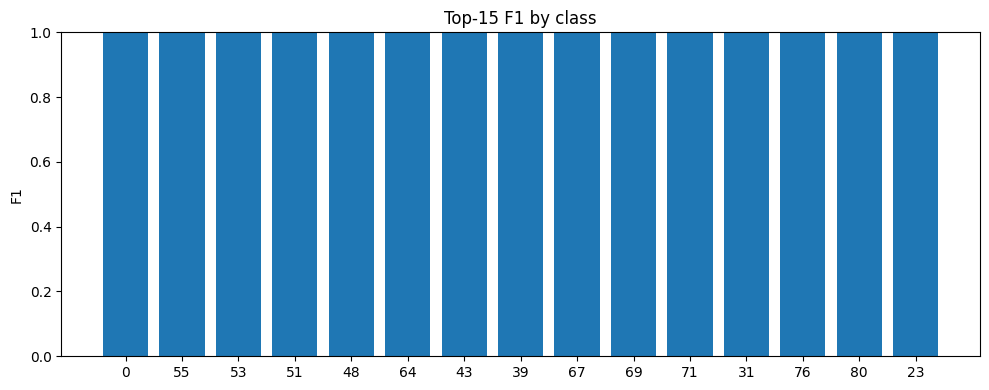

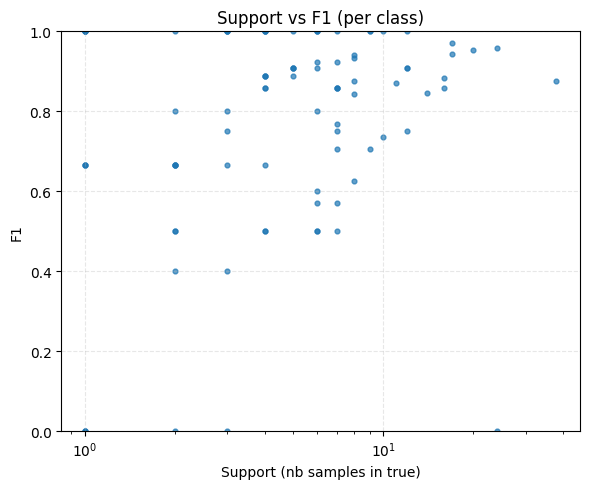

In [ ]:
import json
from pathlib import Path
from typing import List, Dict

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def load_results(paths: List[str]) -> Dict[str, List[int]]:
    y_true, y_pred = [], []
    for p in paths:
        with open(p, "r") as f:
            data = json.load(f)
            y_true.extend(data["y_true"])
            y_pred.extend(data["y_pred"])
    return {"y_true": y_true, "y_pred": y_pred}

def compute_report(y_true, y_pred, num_classes: int = 100):
    labels = list(range(num_classes))
    report = classification_report(
        y_true, y_pred, labels=labels, zero_division=0, output_dict=True
    )
    f1_per_class = np.array([report.get(str(c), {}).get("f1-score", 0.0) for c in labels])
    support_per_class = np.array([report.get(str(c), {}).get("support", 0) for c in labels])

    macro_f1 = report["macro avg"]["f1-score"]
    weighted_f1 = report["weighted avg"]["f1-score"]
    macro_precision = report["macro avg"]["precision"]
    macro_recall = report["macro avg"]["recall"]

    return {
        "report": report,
        "f1_per_class": f1_per_class,
        "support_per_class": support_per_class,
        "macro_f1": macro_f1,
        "weighted_f1": weighted_f1,
        "macro_precision": macro_precision,
        "macro_recall": macro_recall,
    }

def plot_confusion_normalized(y_true, y_pred, num_classes: int = 100):
    cm = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)), normalize="true")
    fig = plt.figure(figsize=(8, 8))
    plt.title("Confusion Matrix (row-normalized)")
    im = plt.imshow(cm, aspect="auto", interpolation="nearest")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

def plot_topk_f1(f1_per_class: np.ndarray, k: int = 15):
    idx_sorted = np.argsort(-f1_per_class)
    top_idx = idx_sorted[:k]
    top_vals = f1_per_class[top_idx]

    fig = plt.figure(figsize=(10, 4))
    plt.title(f"Top-{k} F1 by class")
    x = np.arange(len(top_idx))
    plt.bar(x, top_vals)
    plt.xticks(x, [str(i) for i in top_idx], rotation=0)
    plt.ylabel("F1")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

def plot_support_vs_f1(support: np.ndarray, f1: np.ndarray):
    fig = plt.figure(figsize=(6, 5))
    plt.title("Support vs F1 (per class)")
    plt.scatter(support, f1, s=12, alpha=0.7)
    plt.xlabel("Support (nb samples in true)")
    plt.ylabel("F1")
    plt.ylim(0, 1)
    plt.xscale("log")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()


FILES = ["../data/evaluations/ministral-3b-latest_rag_1000bis.json"]

data = load_results(FILES)
y_true, y_pred = data["y_true"], data["y_pred"]

metrics = compute_report(y_true, y_pred, num_classes=100)

print(f"Macro F1       : {metrics['macro_f1']:.4f}")
print(f"Weighted F1    : {metrics['weighted_f1']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall   : {metrics['macro_recall']:.4f}")

plot_confusion_normalized(y_true, y_pred, num_classes=100)

plot_topk_f1(metrics["f1_per_class"], k=15)

plot_support_vs_f1(metrics["support_per_class"], metrics["f1_per_class"])


Macro F1       : 0.7262
Weighted F1    : 0.7992
Macro Precision: 0.7425
Macro Recall   : 0.7486


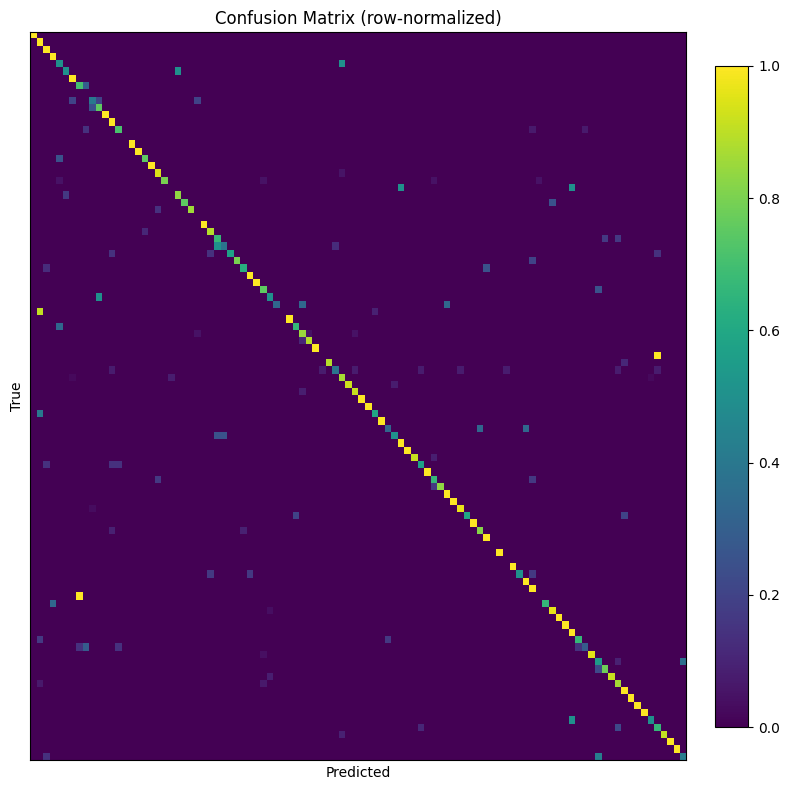

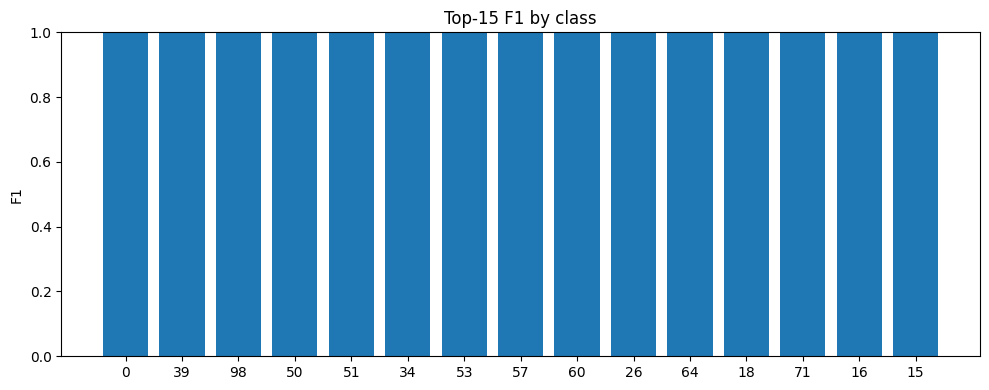

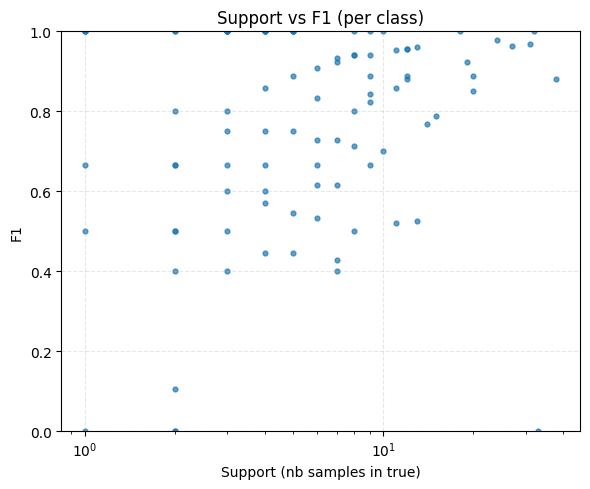

In [49]:
y_true = []
y_pred = []
with open('../data/evaluations/rag_only_eval.txt', 'r') as f:
    for line in f:
        y_true_i = int(line.split(',')[0].split('True: ')[1])
        y_pred_i = int(line.split(',')[1].split('Pred: ')[1])
        y_true.append(y_true_i)
        y_pred.append(y_pred_i)

metrics = compute_report(y_true, y_pred, num_classes=100)

print(f"Macro F1       : {metrics['macro_f1']:.4f}")
print(f"Weighted F1    : {metrics['weighted_f1']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall   : {metrics['macro_recall']:.4f}")

plot_confusion_normalized(y_true, y_pred, num_classes=100)

plot_topk_f1(metrics["f1_per_class"], k=15)

plot_support_vs_f1(metrics["support_per_class"], metrics["f1_per_class"])

Macro F1       : 0.1595
Weighted F1    : 0.2144
Macro Precision: 0.2567
Macro Recall   : 0.1803


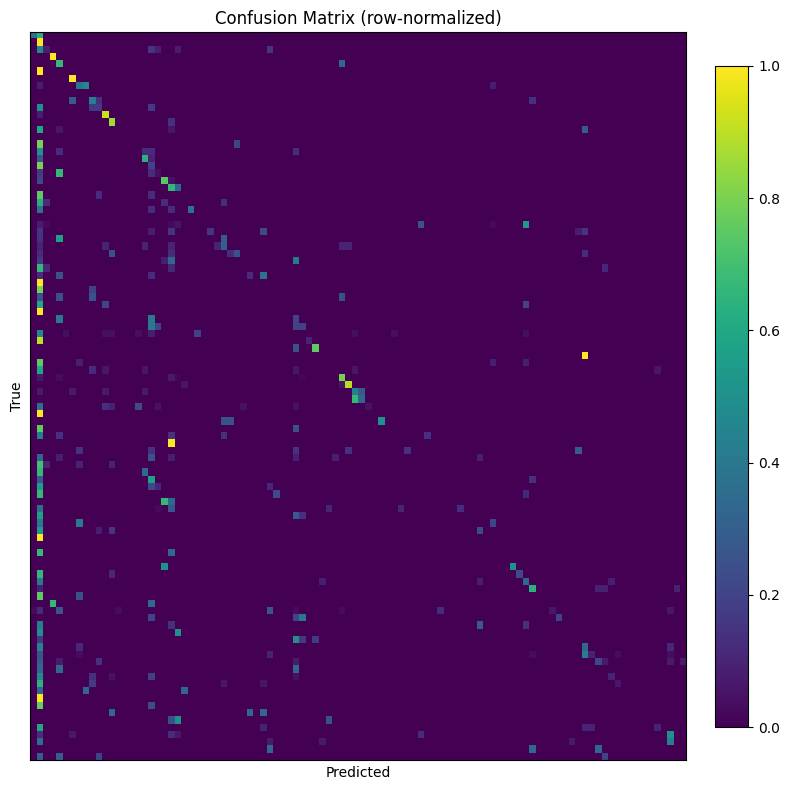

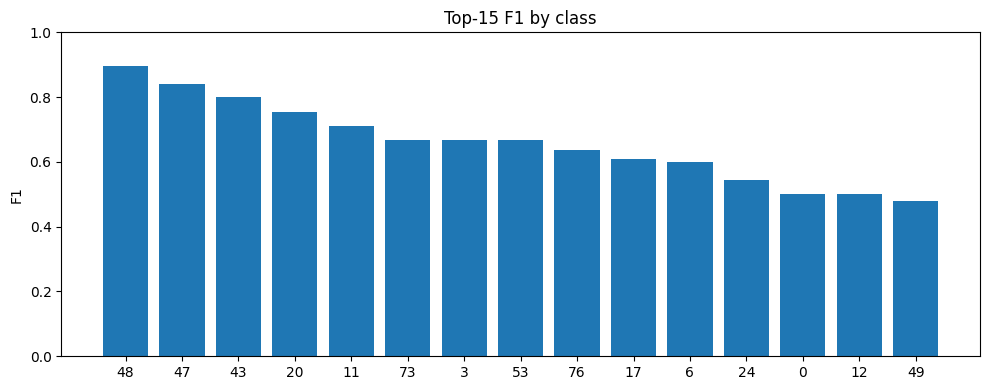

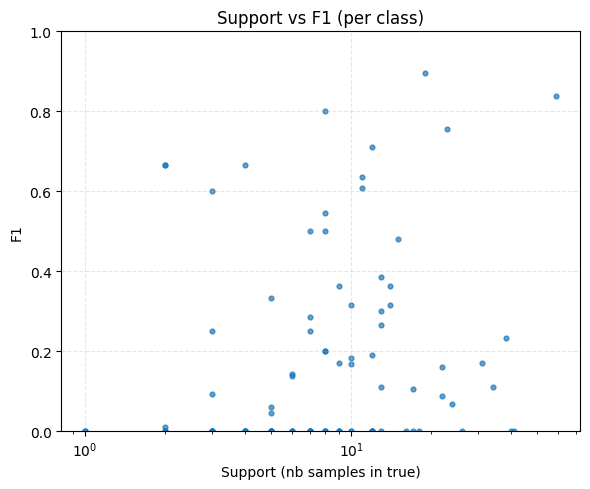

In [ ]:
FILES = ["../data/evaluations/ministral-3b-latest_chatprompt_1000.json"]

data = load_results(FILES)
y_true, y_pred = data["y_true"], data["y_pred"]

metrics = compute_report(y_true, y_pred, num_classes=100)

print(f"Macro F1       : {metrics['macro_f1']:.4f}")
print(f"Weighted F1    : {metrics['weighted_f1']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall   : {metrics['macro_recall']:.4f}")

plot_confusion_normalized(y_true, y_pred, num_classes=100)

plot_topk_f1(metrics["f1_per_class"], k=15)

plot_support_vs_f1(metrics["support_per_class"], metrics["f1_per_class"])

Macro F1       : 0.2517
Weighted F1    : 0.3610
Macro Precision: 0.3415
Macro Recall   : 0.2829


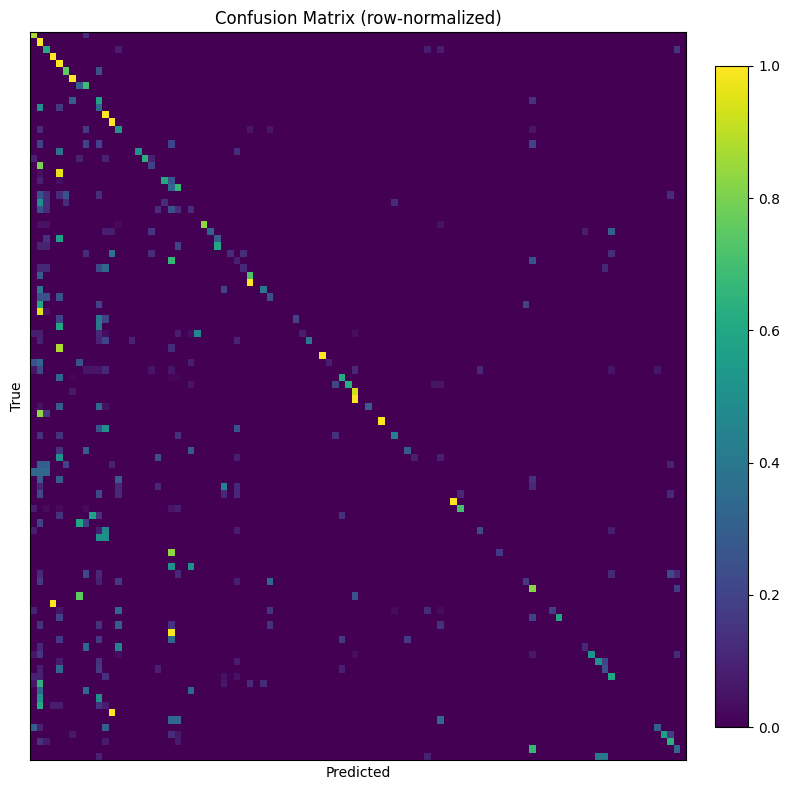

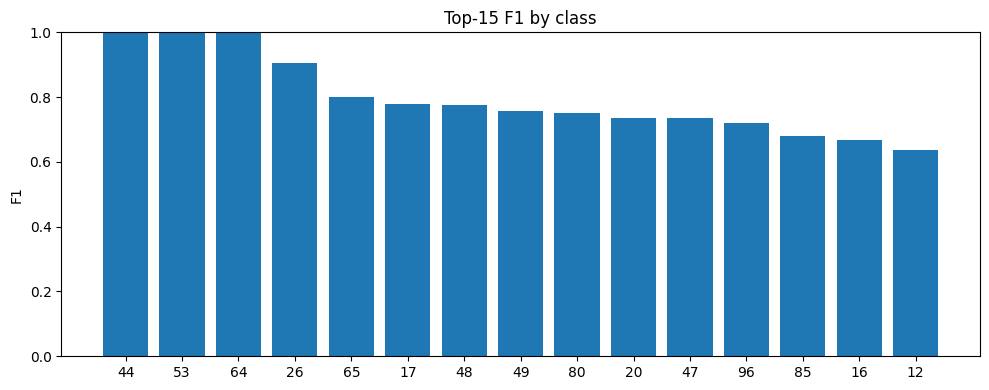

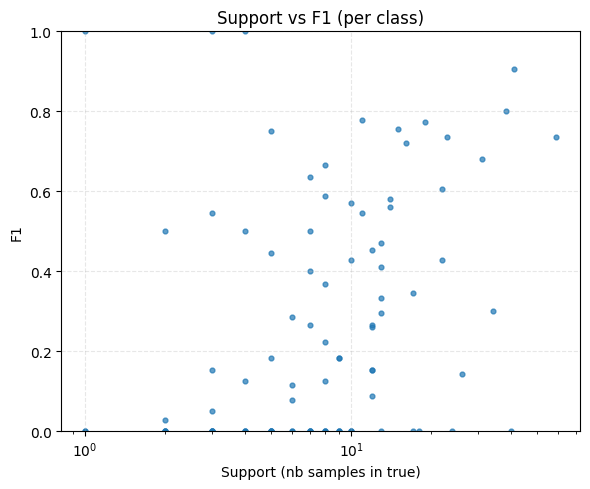

In [ ]:
FILES = ["../data/evaluations/ministral-8b-latest_chatprompt_1000.json"]

data = load_results(FILES)
y_true, y_pred = data["y_true"], data["y_pred"]

metrics = compute_report(y_true, y_pred, num_classes=100)

print(f"Macro F1       : {metrics['macro_f1']:.4f}")
print(f"Weighted F1    : {metrics['weighted_f1']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall   : {metrics['macro_recall']:.4f}")

plot_confusion_normalized(y_true, y_pred, num_classes=100)
plot_topk_f1(metrics["f1_per_class"], k=15)
plot_support_vs_f1(metrics["support_per_class"], metrics["f1_per_class"])

Macro F1       : 0.4989
Weighted F1    : 0.5848
Macro Precision: 0.5642
Macro Recall   : 0.5385


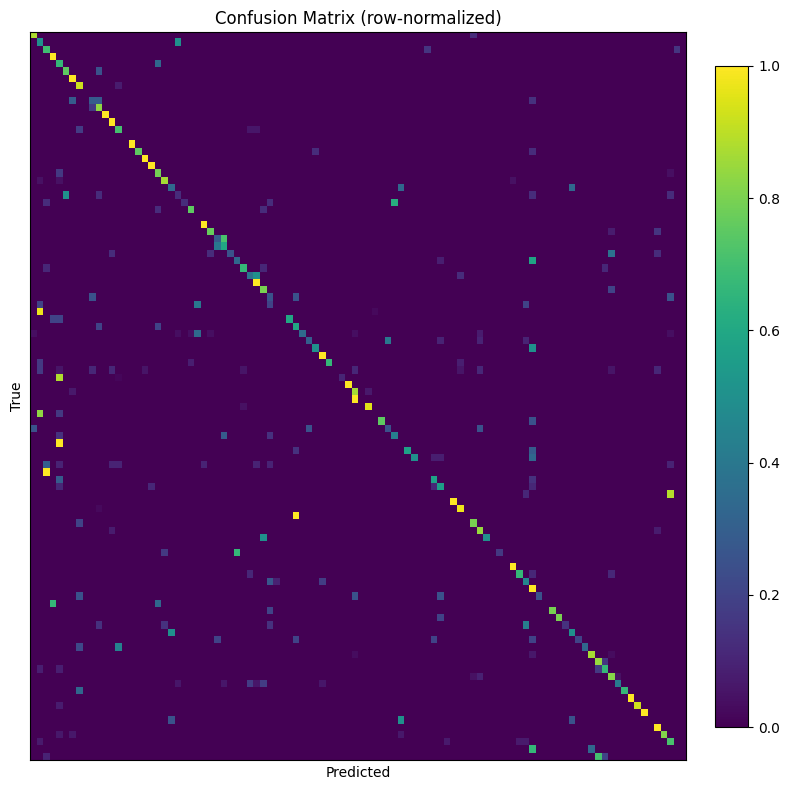

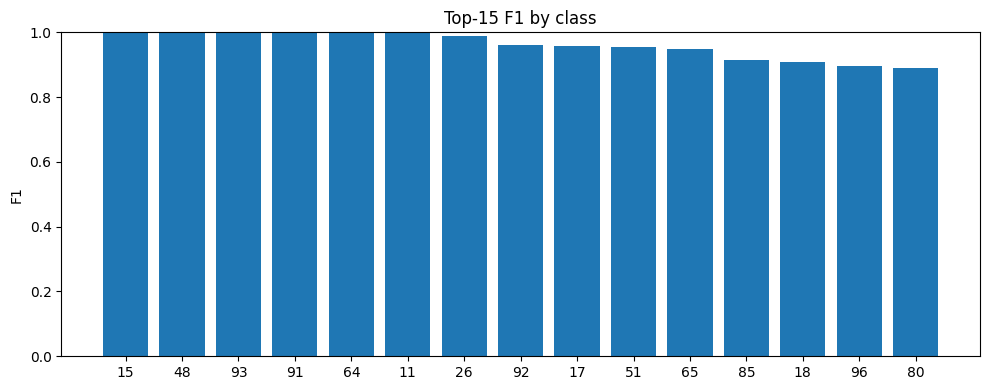

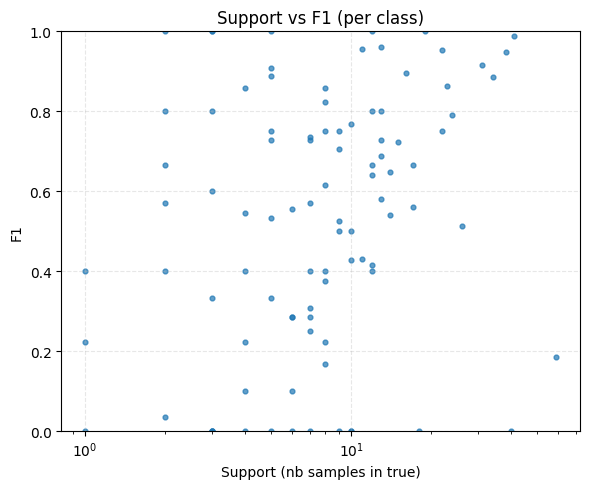

In [ ]:
FILES = ["../data/evaluations/mistral-small-latest_chatprompt_1000.json"]

data = load_results(FILES)
y_true, y_pred = data["y_true"], data["y_pred"]

metrics = compute_report(y_true, y_pred, num_classes=100)

print(f"Macro F1       : {metrics['macro_f1']:.4f}")
print(f"Weighted F1    : {metrics['weighted_f1']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall   : {metrics['macro_recall']:.4f}")

plot_confusion_normalized(y_true, y_pred, num_classes=100)
plot_topk_f1(metrics["f1_per_class"], k=15)
plot_support_vs_f1(metrics["support_per_class"], metrics["f1_per_class"])

Macro F1       : 0.5649
Weighted F1    : 0.6597
Macro Precision: 0.6045
Macro Recall   : 0.6049


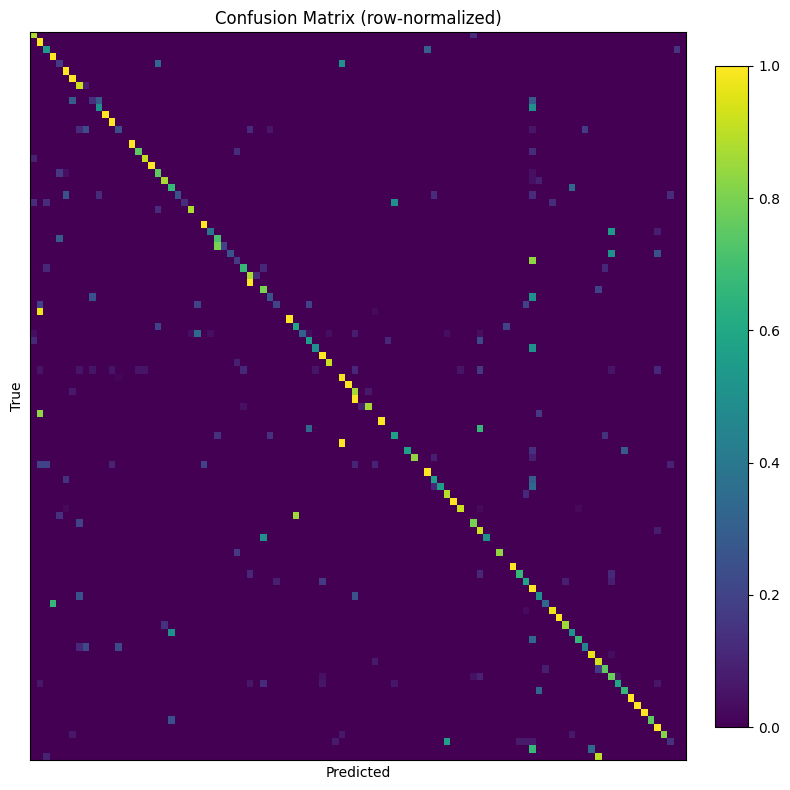

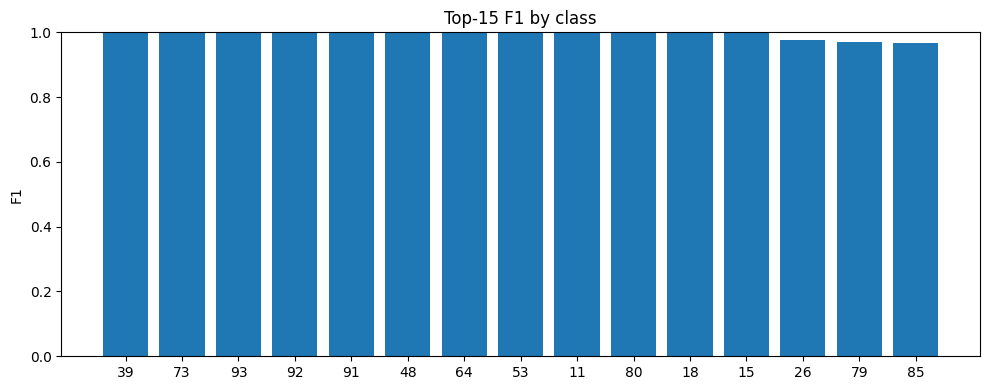

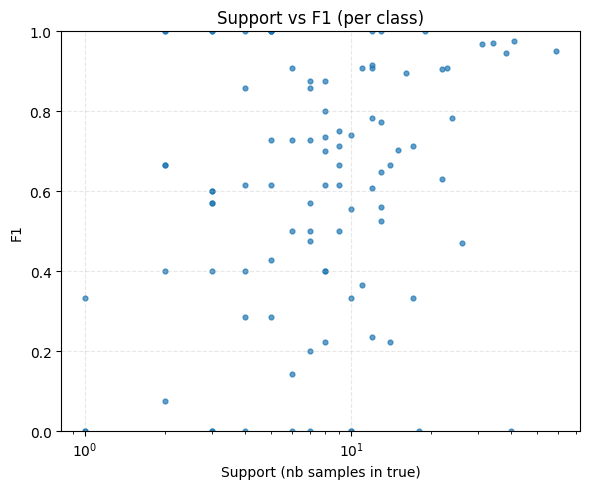

In [ ]:
FILES = ["../data/evaluations/mistral-medium-latest_chatprompt_1000.json"]

data = load_results(FILES)
y_true, y_pred = data["y_true"], data["y_pred"]

metrics = compute_report(y_true, y_pred, num_classes=100)

print(f"Macro F1       : {metrics['macro_f1']:.4f}")
print(f"Weighted F1    : {metrics['weighted_f1']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall   : {metrics['macro_recall']:.4f}")

plot_confusion_normalized(y_true, y_pred, num_classes=100)

plot_topk_f1(metrics["f1_per_class"], k=15)

plot_support_vs_f1(metrics["support_per_class"], metrics["f1_per_class"])

Macro F1       : 0.6352
Weighted F1    : 0.7437
Macro Precision: 0.6519
Macro Recall   : 0.6552


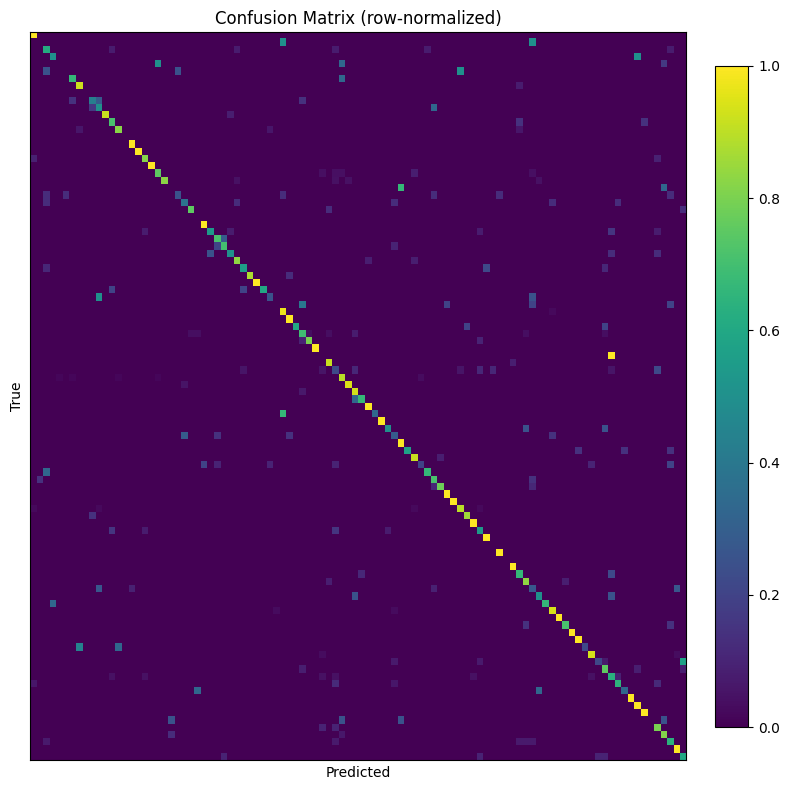

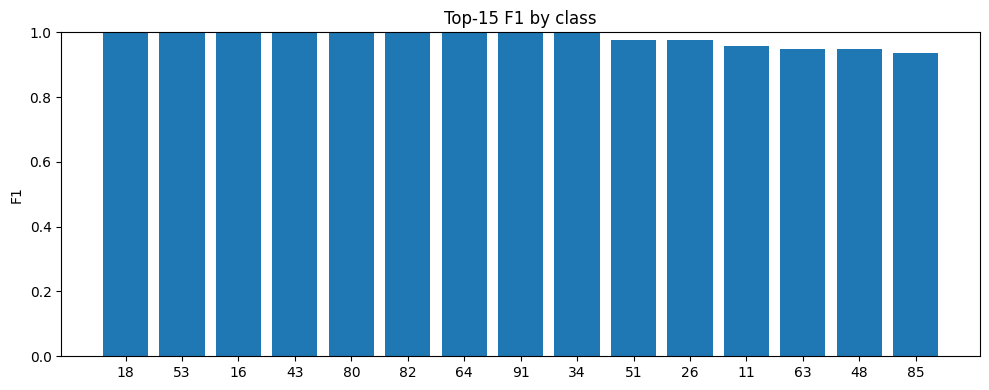

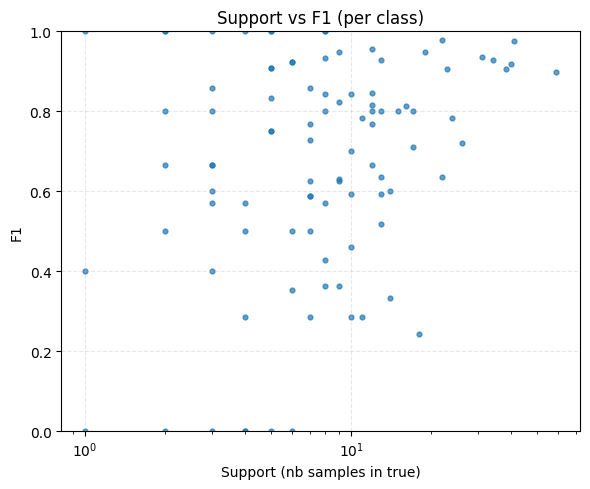

In [ ]:
FILES = ["../data/evaluations/minstral8b_classifhead.json"]

data = load_results(FILES)
y_true, y_pred = data["y_true"], data["y_pred"]

metrics = compute_report(y_true, y_pred, num_classes=100)

print(f"Macro F1       : {metrics['macro_f1']:.4f}")
print(f"Weighted F1    : {metrics['weighted_f1']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall   : {metrics['macro_recall']:.4f}")

plot_confusion_normalized(y_true, y_pred, num_classes=100)
plot_topk_f1(metrics["f1_per_class"], k=15)
plot_support_vs_f1(metrics["support_per_class"], metrics["f1_per_class"])

## results:
### Mistral medium
- Macro F1       : 0.5649
- Weighted F1    : 0.6597
- Macro Precision: 0.6045
- Macro Recall   : 0.6049

### Mistral small
- Macro F1       : 0.4989
- Weighted F1    : 0.5848
- Macro Precision: 0.5642
- Macro Recall   : 0.5385

### Ministral 8B
- Macro F1       : 0.2517
- Weighted F1    : 0.3610
- Macro Precision: 0.3415
- Macro Recall   : 0.2829

### Ministral 3B
- Macro F1       : 0.1595
- Weighted F1    : 0.2144
- Macro Precision: 0.2567
- Macro Recall   : 0.1803

### Lora + classification head
- accuracy          : 0.8540
- Macro F1          : 0.7690
- Weighted F1       : 0.8470
- Macro Precision   : 0.7900
- Macro Recall      : 0.7650

### Classification head
- Macro F1       : 0.6352
- Weighted F1    : 0.7437
- Macro Precision: 0.6519
- Macro Recall   : 0.6552

### RAG + Model
- Macro F1       : 0.7013
- Weighted F1    : 0.8071
- Macro Precision: 0.7177
- Macro Recall   : 0.7111

### RAG Only
- Macro F1       : 0.7262
- Weighted F1    : 0.7992
- Macro Precision: 0.7425
- Macro Recall   : 0.7486

## Different models

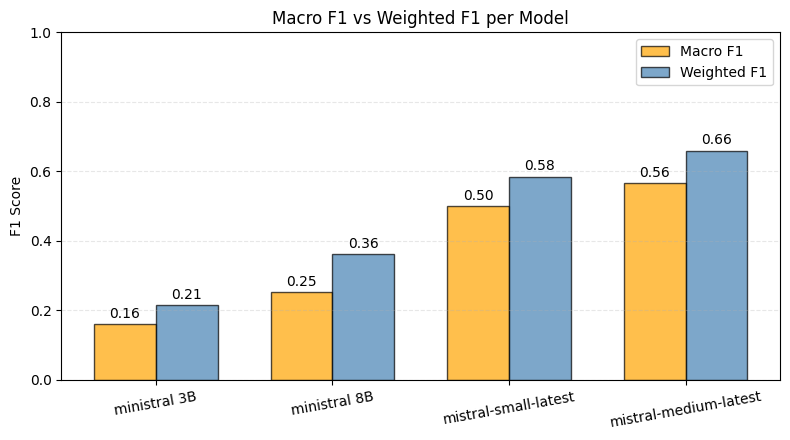

In [30]:
import matplotlib.pyplot as plt
import numpy as np

models = ["ministral 3B", "ministral 8B", "mistral-small-latest", "mistral-medium-latest"]

macro_f1 = [0.1595, 0.2517, 0.4989, 0.5649]
weighted_f1 = [0.2144, 0.3610, 0.5848, 0.6597]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 4.5))
bars1 = plt.bar(x - width/2, macro_f1, width, label="Macro F1", color="orange", edgecolor="black", alpha=0.7)
bars2 = plt.bar(x + width/2, weighted_f1, width, label="Weighted F1", color="steelblue", edgecolor="black", alpha=0.7)

for b, v in zip(bars1, macro_f1):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")
for b, v in zip(bars2, weighted_f1):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")

plt.title("Macro F1 vs Weighted F1 per Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(x, models, rotation=10)
plt.legend()

plt.tight_layout()
# plt.savefig("f1_scores_models.png", dpi=200)
plt.show()



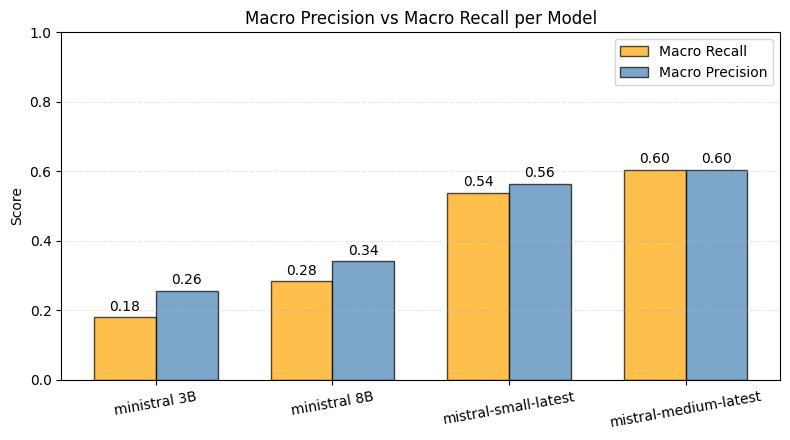

In [31]:
import matplotlib.pyplot as plt
import numpy as np

models = ["ministral 3B", "ministral 8B", "mistral-small-latest", "mistral-medium-latest"]

macro_recall = [0.1803, 0.2829, 0.5385, 0.6049]
macro_precision = [0.2567, 0.3415, 0.5642, 0.6045]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 4.5))
bars1 = plt.bar(x - width/2, macro_recall, width, label="Macro Recall", color="orange", edgecolor="black", alpha=0.7)
bars2 = plt.bar(x + width/2, macro_precision, width, label="Macro Precision", color="steelblue", edgecolor="black", alpha=0.7)

for b, v in zip(bars1, macro_recall):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")
for b, v in zip(bars2, macro_precision):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")

plt.title("Macro Precision vs Macro Recall per Model")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(x, models, rotation=10)
plt.legend()

plt.tight_layout()
# plt.savefig("macro_precision_recall_models.png", dpi=200)
plt.show()


## RAG strategies

In [ ]:
### Lora + classification head
- Macro F1          : 0.7690
- Weighted F1       : 0.8470
- Macro Precision   : 0.7900
- Macro Recall      : 0.7650

### Classification head
- Macro F1       : 0.6352
- Weighted F1    : 0.7437
- Macro Precision: 0.6519
- Macro Recall   : 0.6552

### RAG + Model
- Macro F1       : 0.7013
- Weighted F1    : 0.8071
- Macro Precision: 0.7177
- Macro Recall   : 0.7111

### RAG Only
- Macro F1       : 0.7262
- Weighted F1    : 0.7992
- Macro Precision: 0.7425
- Macro Recall   : 0.7486

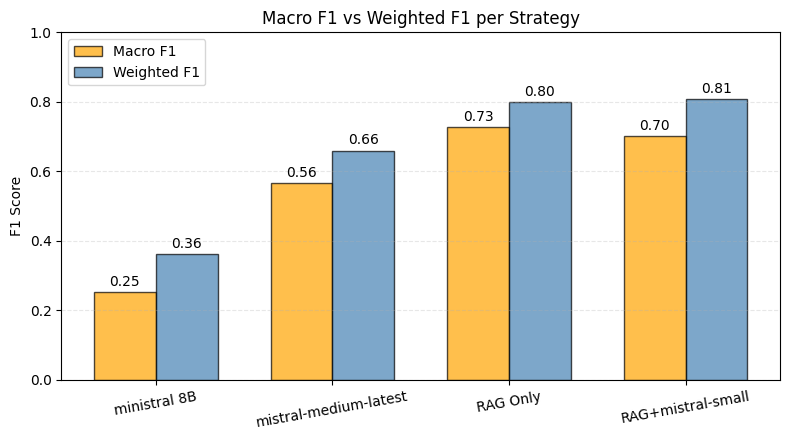

In [61]:
import matplotlib.pyplot as plt
import numpy as np

models = ["ministral 8B", "mistral-medium-latest", "RAG Only", "RAG+mistral-small"]

macro_f1 = [0.2517, 0.5649, 0.7262, 0.7013]
weighted_f1 = [0.3610, 0.6597, 0.7992, 0.8071]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 4.5))
bars1 = plt.bar(x - width/2, macro_f1, width, label="Macro F1", color="orange", edgecolor="black", alpha=0.7)
bars2 = plt.bar(x + width/2, weighted_f1, width, label="Weighted F1", color="steelblue", edgecolor="black", alpha=0.7)

for b, v in zip(bars1, macro_f1):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")
for b, v in zip(bars2, weighted_f1):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")

plt.title("Macro F1 vs Weighted F1 per Strategy")
plt.ylabel("F1 Score")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(x, models, rotation=10)
plt.legend()

plt.tight_layout()
plt.savefig("../images/f1_scores_strategies_rag.png", dpi=200)
plt.show()



In [ ]:
### RAG + Model
- Macro F1       : 0.7013
- Weighted F1    : 0.8071
- Macro Precision: 0.7177
- Macro Recall   : 0.7111

### RAG Only
- Macro F1       : 0.7262
- Weighted F1    : 0.7992
- Macro Precision: 0.7425
- Macro Recall   : 0.7486

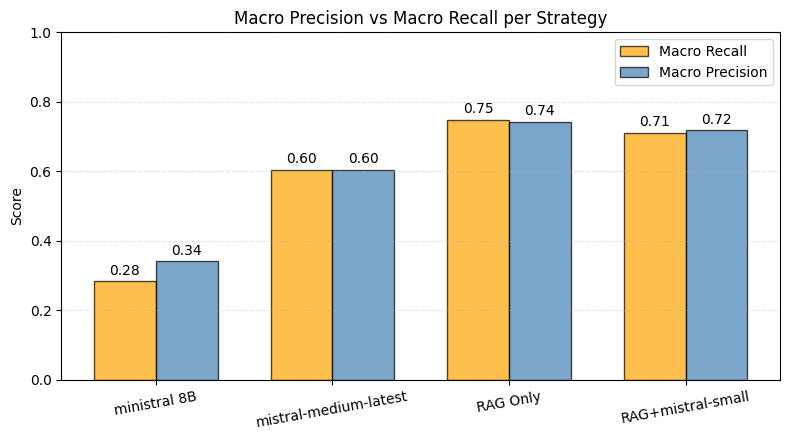

In [62]:
import matplotlib.pyplot as plt
import numpy as np

models = ["ministral 8B", "mistral-medium-latest", "RAG Only", "RAG+mistral-small"]

macro_recall = [0.2829, 0.6049, 0.7486, 0.7111]
macro_precision = [0.3415,0.6045, 0.7425, 0.7177]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 4.5))
bars1 = plt.bar(x - width/2, macro_recall, width, label="Macro Recall", color="orange", edgecolor="black", alpha=0.7)
bars2 = plt.bar(x + width/2, macro_precision, width, label="Macro Precision", color="steelblue", edgecolor="black", alpha=0.7)

for b, v in zip(bars1, macro_recall):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")
for b, v in zip(bars2, macro_precision):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")

plt.title("Macro Precision vs Macro Recall per Strategy")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(x, models, rotation=10)
plt.legend()

plt.tight_layout()
plt.savefig("../images/recall_precision_strategies_rag.png", dpi=200)
plt.show()


## Finetuned models

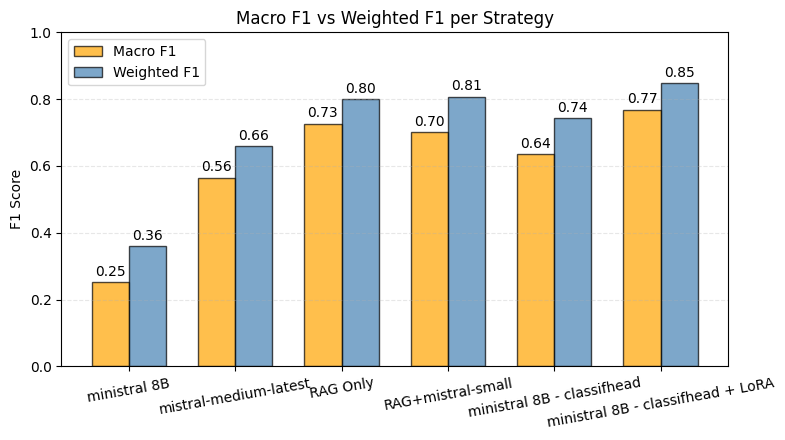

In [63]:
import matplotlib.pyplot as plt
import numpy as np

models = ["ministral 8B", "mistral-medium-latest", "RAG Only", "RAG+mistral-small", "ministral 8B - classifhead", "ministral 8B - classifhead + LoRA"]

macro_f1 = [0.2517, 0.5649, 0.7262, 0.7013, 0.6352, 0.7690]
weighted_f1 = [0.3610, 0.6597, 0.7992, 0.8071, 0.7437, 0.8470]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 4.5))
bars1 = plt.bar(x - width/2, macro_f1, width, label="Macro F1", color="orange", edgecolor="black", alpha=0.7)
bars2 = plt.bar(x + width/2, weighted_f1, width, label="Weighted F1", color="steelblue", edgecolor="black", alpha=0.7)

for b, v in zip(bars1, macro_f1):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")
for b, v in zip(bars2, weighted_f1):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")

plt.title("Macro F1 vs Weighted F1 per Strategy")
plt.ylabel("F1 Score")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(x, models, rotation=10)
plt.legend()

plt.tight_layout()
plt.savefig("../images/f1_scores_strategies_finetuned.png", dpi=200)
plt.show()



In [ ]:
### Lora + classification head
- Macro F1          : 0.7690
- Weighted F1       : 0.8470
- Macro Precision   : 0.7900
- Macro Recall      : 0.7650

### Classification head
- Macro F1       : 0.6352
- Weighted F1    : 0.7437
- Macro Precision: 0.6519
- Macro Recall   : 0.6552

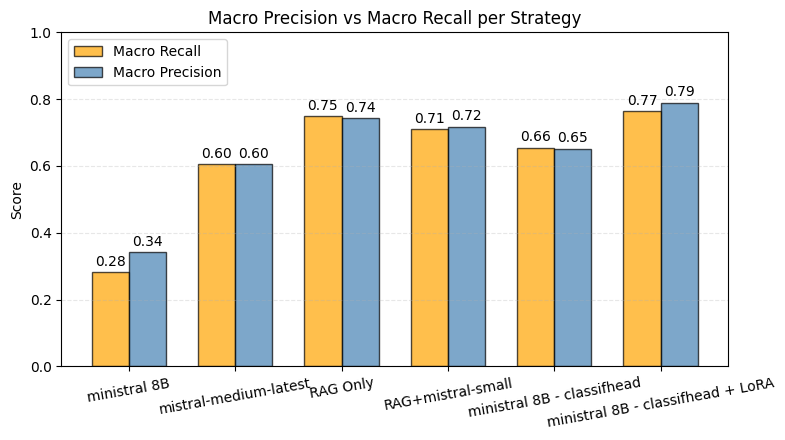

In [64]:
import matplotlib.pyplot as plt
import numpy as np

models = ["ministral 8B", "mistral-medium-latest", "RAG Only", "RAG+mistral-small", "ministral 8B - classifhead", "ministral 8B - classifhead + LoRA"]

macro_recall = [0.2829, 0.6049, 0.7486, 0.7111, 0.6552, 0.7650]
macro_precision = [0.3415,0.6045, 0.7425, 0.7177, 0.6519, 0.7900]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 4.5))
bars1 = plt.bar(x - width/2, macro_recall, width, label="Macro Recall", color="orange", edgecolor="black", alpha=0.7)
bars2 = plt.bar(x + width/2, macro_precision, width, label="Macro Precision", color="steelblue", edgecolor="black", alpha=0.7)

for b, v in zip(bars1, macro_recall):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")
for b, v in zip(bars2, macro_precision):
    plt.text(b.get_x() + b.get_width()/2, v + 0.01, f"{v:.2f}", ha="center", va="bottom")

plt.title("Macro Precision vs Macro Recall per Strategy")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(x, models, rotation=10)
plt.legend()

plt.tight_layout()
plt.savefig("../images/precision_recall_strategies_finetuned.png", dpi=200)
plt.show()


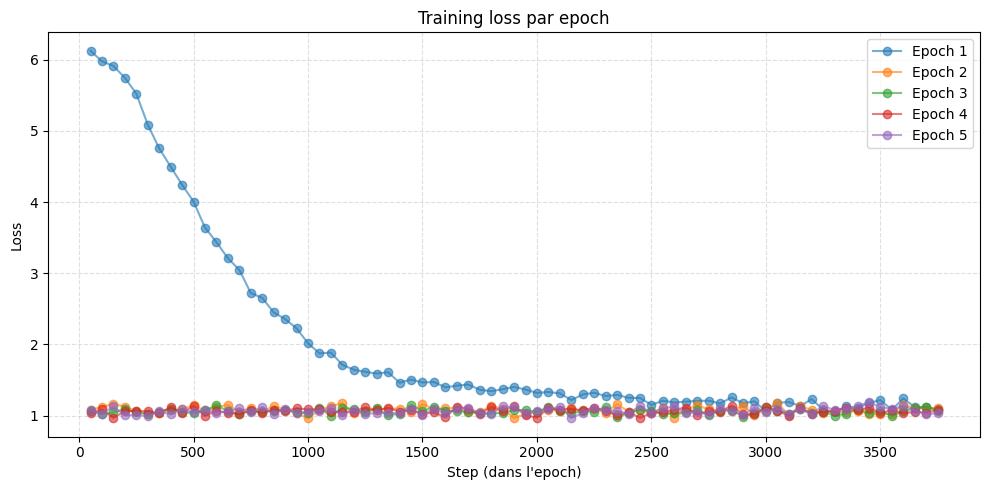

In [38]:
import re
import matplotlib.pyplot as plt

LOG = r"""
[elle maintenant

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
Loading base...

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]
Loading checkpoint shards:  25%|██▌       | 1/4 [00:05<00:16,  5.50s/it]
Loading checkpoint shards:  50%|█████     | 2/4 [00:07<00:06,  3.45s/it]
Loading checkpoint shards:  75%|███████▌  | 3/4 [00:13<00:04,  4.61s/it]
Loading checkpoint shards: 100%|██████████| 4/4 [00:14<00:00,  3.04s/it]
Loading checkpoint shards: 100%|██████████| 4/4 [00:14<00:00,  3.54s/it]
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Preparing data...
Training: epochs=5, steps=18750, labels=100

Epoch 1/5
step 50 | loss 6.1258
step 100 | loss 5.9761
step 150 | loss 5.9119
step 200 | loss 5.7465
step 250 | loss 5.5234
step 300 | loss 5.0879
step 350 | loss 4.7539
step 400 | loss 4.4979
step 450 | loss 4.2423
step 500 | loss 4.0069
step 550 | loss 3.6410
step 600 | loss 3.4376
step 650 | loss 3.2108
step 700 | loss 3.0480
step 750 | loss 2.7230
step 800 | loss 2.6538
step 850 | loss 2.4502
step 900 | loss 2.3571
step 950 | loss 2.2256
step 1000 | loss 2.0180
step 1050 | loss 1.8746
step 1100 | loss 1.8858
step 1150 | loss 1.7138
step 1200 | loss 1.6442
step 1250 | loss 1.6149
step 1300 | loss 1.5911
step 1350 | loss 1.6098
step 1400 | loss 1.4619
step 1450 | loss 1.5067
step 1500 | loss 1.4660
step 1550 | loss 1.4720
step 1600 | loss 1.3972
step 1650 | loss 1.4209
step 1700 | loss 1.4363
step 1750 | loss 1.3638
step 1800 | loss 1.3430
step 1850 | loss 1.3713
step 1900 | loss 1.4026
step 1950 | loss 1.3659
step 2000 | loss 1.3197
step 2050 | loss 1.3324
step 2100 | loss 1.3130
step 2150 | loss 1.2187
step 2200 | loss 1.2973
step 2250 | loss 1.3209
step 2300 | loss 1.2751
step 2350 | loss 1.2913
step 2400 | loss 1.2498
step 2450 | loss 1.2484
step 2500 | loss 1.1513
step 2550 | loss 1.2095
step 2600 | loss 1.1856
step 2650 | loss 1.1965
step 2700 | loss 1.2069
step 2750 | loss 1.2098
step 2800 | loss 1.1709
step 2850 | loss 1.2555
step 2900 | loss 1.1738
step 2950 | loss 1.2011
step 3000 | loss 1.0620
step 3050 | loss 1.1814
step 3100 | loss 1.1903
step 3150 | loss 1.1349
step 3200 | loss 1.2328
step 3250 | loss 1.0818
step 3300 | loss 1.0502
step 3350 | loss 1.1287
step 3400 | loss 1.1051
step 3450 | loss 1.1772
step 3500 | loss 1.2187
step 3550 | loss 1.0827
step 3600 | loss 1.2426
step 3650 | loss 1.1189
step 3700 | loss 1.1208
step 3750 | loss 1.0907

Validation:
                              precision    recall  f1-score   support

                 Adjustments      0.610     0.521     0.562        48
                  Agreements      0.333     0.045     0.080        22
                  Amendments      0.630     0.860     0.727       257
        Anti-Corruption Laws      0.857     0.462     0.600        26
             Applicable Laws      0.000     0.000     0.000        69
                   Approvals      0.429     0.231     0.300        26
                 Arbitration      0.889     0.941     0.914        68
                 Assignments      0.716     0.923     0.807       208
                     Assigns      0.000     0.000     0.000         3
                   Authority      0.430     0.580     0.494        69
              Authorizations      0.370     0.377     0.374       106
                 Base Salary      0.949     0.974     0.961       114
                    Benefits      0.806     0.707     0.753        82
             Binding Effects      0.487     0.624     0.547        93
                     Brokers      0.890     0.956     0.922        68
              Capitalization      0.877     0.941     0.908        68
           Change In Control      0.733     0.767     0.750        43
                    Closings      0.809     0.950     0.874        80
        Compliance With Laws      0.768     0.874     0.818       167
             Confidentiality      0.759     0.953     0.845       149
     Consent To Jurisdiction      1.000     0.029     0.056        35
                    Consents      0.586     0.298     0.395        57
                Construction      0.453     0.348     0.393        69
                 Cooperation      0.633     0.567     0.598        67
                       Costs      0.600     0.136     0.222        22
                Counterparts      0.966     0.986     0.976       429
                       Death      0.780     0.627     0.696        51
               Defined Terms      0.496     0.833     0.622        72
                 Definitions      0.702     0.430     0.533        93
                  Disability      0.829     0.674     0.744        43
                 Disclosures      0.818     0.779     0.798       104
                      Duties      0.597     0.656     0.625        61
             Effective Dates      0.688     0.724     0.705        76
               Effectiveness      1.000     0.304     0.467        46
                  Employment      0.469     0.714     0.566        42
              Enforceability      0.536     0.263     0.353        57
                Enforcements      0.333     0.022     0.041        46
           Entire Agreements      0.831     0.959     0.890       389
                       Erisa      0.980     0.877     0.926        57
                   Existence      0.900     0.730     0.806        37
                    Expenses      0.637     0.835     0.723       170
                        Fees      0.716     0.603     0.655       121
        Financial Statements      0.928     0.900     0.914       100
                 Forfeitures      0.469     0.826     0.598        46
          Further Assurances      0.833     0.935     0.881       155
                     General      0.322     0.187     0.236       150
              Governing Laws      0.802     0.960     0.874       494
                    Headings      0.863     0.952     0.906       126
            Indemnifications      0.674     0.843     0.749       140
                   Indemnity      0.769     0.213     0.333        47
                  Insurances      0.934     0.902     0.918       204
                 Integration      0.824     0.264     0.400        53
       Intellectual Property      0.825     0.943     0.880        70
                   Interests      0.778     0.549     0.644        51
             Interpretations      0.562     0.228     0.324        79
               Jurisdictions      0.452     0.424     0.438        33
                       Liens      0.667     0.691     0.679        55
                 Litigations      0.856     0.934     0.893       166
               Miscellaneous      0.909     0.149     0.256        67
               Modifications      0.600     0.075     0.133        40
                No Conflicts      0.709     0.880     0.785       108
                 No Defaults      0.830     0.786     0.807        56
                  No Waivers      0.853     0.387     0.532        75
           Non-Disparagement      0.961     0.891     0.925        55
                     Notices      0.886     0.902     0.894       398
               Organizations      0.685     0.897     0.777        68
              Participations      0.811     0.741     0.774        81
                    Payments      0.606     0.554     0.579       175
                   Positions      0.545     0.353     0.429        34
                      Powers      0.500     0.267     0.348        15
                   Publicity      0.815     0.880     0.846        50
              Qualifications      0.000     0.000     0.000         8
                     Records      0.698     0.685     0.692        54
                    Releases      0.694     0.747     0.720        91
                    Remedies      0.608     0.807     0.693       119
             Representations      0.516     0.348     0.416        92
                       Sales      0.846     0.673     0.750        49
                   Sanctions      0.548     0.708     0.618        24
                Severability      0.903     0.985     0.942       332
                    Solvency      0.761     0.959     0.848        73
        Specific Performance      0.731     0.396     0.514        48
  Submission To Jurisdiction      0.510     0.619     0.559        42
                Subsidiaries      0.800     0.842     0.821        95
                  Successors      0.839     0.516     0.639        91
                    Survival      0.778     0.915     0.841       260
            Tax Withholdings      0.367     0.579     0.449        57
                       Taxes      0.765     0.729     0.746       214
                Terminations      0.690     0.658     0.674       193
                       Terms      0.850     0.639     0.730       169
                      Titles      0.472     0.386     0.425        44
Transactions With Affiliates      0.962     0.987     0.974        76
             Use Of Proceeds      0.926     0.920     0.923       137
                   Vacations      0.981     0.962     0.971        53
                      Venues      0.000     0.000     0.000        19
                     Vesting      0.610     0.771     0.681        83
       Waiver Of Jury Trials      0.766     0.966     0.855       146
                     Waivers      0.645     0.774     0.704       155
                  Warranties      0.586     0.386     0.466        88
                Withholdings      0.537     0.333     0.411        87

                    accuracy                          0.750     10000
                   macro avg      0.682     0.625     0.625     10000
                weighted avg      0.742     0.750     0.730     10000


Epoch 2/5
step 50 | loss 1.0824
step 100 | loss 1.1230
step 150 | loss 1.1639
step 200 | loss 1.1270
step 250 | loss 1.0629
step 300 | loss 1.0235
step 350 | loss 1.0365
step 400 | loss 1.0795
step 450 | loss 1.0882
step 500 | loss 1.1461
step 550 | loss 1.0654
step 600 | loss 1.1209
step 650 | loss 1.1498
step 700 | loss 1.0533
step 750 | loss 1.1127
step 800 | loss 1.0630
step 850 | loss 1.1297
step 900 | loss 1.0843
step 950 | loss 1.0373
step 1000 | loss 0.9620
step 1050 | loss 1.0832
step 1100 | loss 1.1325
step 1150 | loss 1.1746
step 1200 | loss 1.0317
step 1250 | loss 1.0585
step 1300 | loss 1.0896
step 1350 | loss 1.0967
step 1400 | loss 1.1002
step 1450 | loss 1.0515
step 1500 | loss 1.1616
step 1550 | loss 1.0902
step 1600 | loss 1.1014
step 1650 | loss 1.1099
step 1700 | loss 1.0443
step 1750 | loss 1.0509
step 1800 | loss 1.1365
step 1850 | loss 1.0990
step 1900 | loss 0.9647
step 1950 | loss 1.0247
step 2000 | loss 1.0489
step 2050 | loss 1.0802
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
step 2100 | loss 1.0679
step 2150 | loss 1.1068
step 2200 | loss 1.0588
step 2250 | loss 1.0994
step 2300 | loss 1.0378
step 2350 | loss 1.1622
step 2400 | loss 1.0538
step 2450 | loss 1.0853
step 2500 | loss 1.0331
step 2550 | loss 1.1138
step 2600 | loss 0.9703
step 2650 | loss 1.0777
step 2700 | loss 1.1439
step 2750 | loss 1.0866
step 2800 | loss 1.0692
step 2850 | loss 1.0691
step 2900 | loss 1.1374
step 2950 | loss 1.0157
step 3000 | loss 1.0826
step 3050 | loss 1.1799
step 3100 | loss 1.0098
step 3150 | loss 1.1352
step 3200 | loss 1.0779
step 3250 | loss 1.0402
step 3300 | loss 1.0658
step 3350 | loss 1.0461
step 3400 | loss 1.0692
step 3450 | loss 1.0211
step 3500 | loss 1.0208
step 3550 | loss 1.0246
step 3600 | loss 1.1505
step 3650 | loss 1.1036
step 3700 | loss 1.1061
step 3750 | loss 1.1061

Validation:
                              precision    recall  f1-score   support

                 Adjustments      0.567     0.708     0.630        48
                  Agreements      0.200     0.045     0.074        22
                  Amendments      0.669     0.833     0.742       257
        Anti-Corruption Laws      0.857     0.462     0.600        26
             Applicable Laws      0.000     0.000     0.000        69
                   Approvals      0.400     0.077     0.129        26
                 Arbitration      0.865     0.941     0.901        68
                 Assignments      0.744     0.923     0.824       208
                     Assigns      0.000     0.000     0.000         3
                   Authority      0.487     0.551     0.517        69
              Authorizations      0.442     0.434     0.438       106
                 Base Salary      0.965     0.974     0.969       114
                    Benefits      0.785     0.756     0.770        82
             Binding Effects      0.495     0.581     0.535        93
                     Brokers      0.878     0.956     0.915        68
              Capitalization      0.865     0.941     0.901        68
           Change In Control      0.686     0.814     0.745        43
                    Closings      0.792     0.950     0.864        80
        Compliance With Laws      0.804     0.862     0.832       167
             Confidentiality      0.821     0.926     0.871       149
     Consent To Jurisdiction      1.000     0.029     0.056        35
                    Consents      0.533     0.421     0.471        57
                Construction      0.500     0.275     0.355        69
                 Cooperation      0.712     0.552     0.622        67
                       Costs      0.500     0.136     0.214        22
                Counterparts      0.966     0.984     0.975       429
                       Death      0.739     0.667     0.701        51
               Defined Terms      0.574     0.542     0.557        72
                 Definitions      0.623     0.710     0.663        93
                  Disability      0.868     0.767     0.815        43
                 Disclosures      0.825     0.817     0.821       104
                      Duties      0.667     0.656     0.661        61
             Effective Dates      0.691     0.737     0.713        76
               Effectiveness      0.800     0.348     0.485        46
                  Employment      0.583     0.667     0.622        42
              Enforceability      0.477     0.368     0.416        57
                Enforcements      0.308     0.087     0.136        46
           Entire Agreements      0.850     0.961     0.902       389
                       Erisa      0.981     0.930     0.955        57
                   Existence      0.903     0.757     0.824        37
                    Expenses      0.709     0.829     0.764       170
                        Fees      0.741     0.661     0.699       121
        Financial Statements      0.892     0.910     0.901       100
                 Forfeitures      0.557     0.848     0.672        46
          Further Assurances      0.824     0.935     0.876       155
                     General      0.282     0.220     0.247       150
              Governing Laws      0.805     0.968     0.879       494
                    Headings      0.857     0.952     0.902       126
            Indemnifications      0.696     0.836     0.760       140
                   Indemnity      0.611     0.234     0.338        47
                  Insurances      0.930     0.907     0.918       204
                 Integration      0.789     0.283     0.417        53
       Intellectual Property      0.795     0.943     0.863        70
                   Interests      0.667     0.627     0.646        51
             Interpretations      0.441     0.380     0.408        79
               Jurisdictions      0.407     0.333     0.367        33
                       Liens      0.725     0.673     0.698        55
                 Litigations      0.895     0.922     0.908       166
               Miscellaneous      0.875     0.209     0.337        67
               Modifications      0.800     0.100     0.178        40
                No Conflicts      0.686     0.889     0.774       108
                 No Defaults      0.878     0.768     0.819        56
                  No Waivers      0.705     0.573     0.632        75
           Non-Disparagement      0.944     0.927     0.936        55
                     Notices      0.885     0.907     0.896       398
               Organizations      0.709     0.897     0.792        68
              Participations      0.816     0.765     0.790        81
                    Payments      0.583     0.560     0.571       175
                   Positions      0.568     0.618     0.592        34
                      Powers      0.500     0.267     0.348        15
                   Publicity      0.849     0.900     0.874        50
              Qualifications      0.500     0.125     0.200         8
                     Records      0.709     0.722     0.716        54
                    Releases      0.670     0.780     0.721        91
                    Remedies      0.686     0.681     0.684       119
             Representations      0.553     0.283     0.374        92
                       Sales      0.842     0.653     0.736        49
                   Sanctions      0.529     0.750     0.621        24
                Severability      0.898     0.985     0.940       332
                    Solvency      0.814     0.959     0.881        73
        Specific Performance      0.589     0.688     0.635        48
  Submission To Jurisdiction      0.500     0.643     0.562        42
                Subsidiaries      0.794     0.853     0.822        95
                  Successors      0.768     0.582     0.662        91
                    Survival      0.850     0.869     0.859       260
            Tax Withholdings      0.380     0.526     0.441        57
                       Taxes      0.818     0.715     0.763       214
                Terminations      0.720     0.653     0.685       193
                       Terms      0.797     0.675     0.731       169
                      Titles      0.571     0.364     0.444        44
Transactions With Affiliates      0.974     0.987     0.980        76
             Use Of Proceeds      0.907     0.927     0.917       137
                   Vacations      0.962     0.962     0.962        53
                      Venues      0.000     0.000     0.000        19
                     Vesting      0.713     0.687     0.699        83
       Waiver Of Jury Trials      0.797     0.966     0.873       146
                     Waivers      0.669     0.755     0.709       155
                  Warranties      0.490     0.545     0.516        88
                Withholdings      0.513     0.460     0.485        87

                    accuracy                          0.760     10000
                   macro avg      0.685     0.644     0.643     10000
                weighted avg      0.748     0.760     0.744     10000


Epoch 3/5
step 50 | loss 1.0682
step 100 | loss 1.0227
step 150 | loss 1.0455
step 200 | loss 1.0888
step 250 | loss 1.0459
step 300 | loss 1.0189
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/fsx/jdelavande/lextral/backend/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
step 350 | loss 1.0508
step 400 | loss 1.0981
step 450 | loss 1.0577
step 500 | loss 1.0307
step 550 | loss 1.0748
step 600 | loss 1.1430
step 650 | loss 1.0657
step 700 | loss 1.0195
step 750 | loss 1.0693
step 800 | loss 1.0504
step 850 | loss 1.0691
step 900 | loss 1.0800
step 950 | loss 1.0479
step 1000 | loss 1.0343
step 1050 | loss 1.1115
step 1100 | loss 0.9904
step 1150 | loss 1.1112
step 1200 | loss 1.0884
step 1250 | loss 1.0451
step 1300 | loss 1.1014
step 1350 | loss 1.0021
step 1400 | loss 1.0297
step 1450 | loss 1.1547
step 1500 | loss 1.0630
step 1550 | loss 1.1254
step 1600 | loss 1.0664
step 1650 | loss 1.0641
step 1700 | loss 1.0504
step 1750 | loss 1.0326
step 1800 | loss 1.0333
step 1850 | loss 1.0375
step 1900 | loss 1.0788
step 1950 | loss 1.0788
step 2000 | loss 1.0468
step 2050 | loss 1.1243
step 2100 | loss 1.0641
step 2150 | loss 1.0396
step 2200 | loss 1.0584
step 2250 | loss 1.0578
step 2300 | loss 1.1240
step 2350 | loss 0.9749
step 2400 | loss 1.0378
step 2450 | loss 1.0835
step 2500 | loss 1.0656
step 2550 | loss 1.0254
step 2600 | loss 1.0335
step 2650 | loss 1.0541
step 2700 | loss 1.0782
step 2750 | loss 1.0079
step 2800 | loss 1.0680
step 2850 | loss 1.0857
step 2900 | loss 0.9864
step 2950 | loss 1.0358
step 3000 | loss 1.1165
step 3050 | loss 1.0683
step 3100 | loss 1.0277
step 3150 | loss 1.0948
step 3200 | loss 1.0350
step 3250 | loss 1.0579
step 3300 | loss 0.9982
step 3350 | loss 1.0286
step 3400 | loss 1.1000
step 3450 | loss 1.0303
step 3500 | loss 1.0697
step 3550 | loss 0.9976
step 3600 | loss 1.0616
step 3650 | loss 1.1017
step 3700 | loss 1.1233
step 3750 | loss 1.0685

Validation:
                              precision    recall  f1-score   support

                 Adjustments      0.593     0.667     0.627        48
                  Agreements      0.100     0.045     0.062        22
                  Amendments      0.672     0.852     0.751       257
        Anti-Corruption Laws      0.800     0.462     0.585        26
             Applicable Laws      0.000     0.000     0.000        69
                   Approvals      0.545     0.231     0.324        26
                 Arbitration      0.867     0.956     0.909        68
                 Assignments      0.774     0.923     0.842       208
                     Assigns      0.000     0.000     0.000         3
                   Authority      0.376     0.594     0.461        69
              Authorizations      0.400     0.302     0.344       106
                 Base Salary      0.949     0.974     0.961       114
                    Benefits      0.795     0.756     0.775        82
             Binding Effects      0.494     0.473     0.484        93
                     Brokers      0.890     0.956     0.922        68
              Capitalization      0.877     0.941     0.908        68
           Change In Control      0.679     0.837     0.750        43
                    Closings      0.809     0.950     0.874        80
        Compliance With Laws      0.811     0.874     0.841       167
             Confidentiality      0.821     0.926     0.871       149
     Consent To Jurisdiction      0.750     0.171     0.279        35
                    Consents      0.591     0.456     0.515        57
                Construction      0.472     0.362     0.410        69
                 Cooperation      0.661     0.582     0.619        67
                       Costs      0.429     0.136     0.207        22
                Counterparts      0.966     0.981     0.973       429
                       Death      0.740     0.725     0.733        51
               Defined Terms      0.621     0.500     0.554        72
                 Definitions      0.621     0.774     0.689        93
                  Disability      0.821     0.744     0.780        43
                 Disclosures      0.845     0.788     0.816       104
                      Duties      0.645     0.656     0.650        61
             Effective Dates      0.746     0.697     0.721        76
               Effectiveness      0.792     0.413     0.543        46
                  Employment      0.600     0.643     0.621        42
              Enforceability      0.458     0.386     0.419        57
                Enforcements      0.200     0.022     0.039        46
           Entire Agreements      0.863     0.956     0.907       389
                       Erisa      0.981     0.930     0.955        57
                   Existence      0.848     0.757     0.800        37
                    Expenses      0.707     0.824     0.761       170
                        Fees      0.745     0.653     0.696       121
        Financial Statements      0.911     0.920     0.915       100
                 Forfeitures      0.640     0.696     0.667        46
          Further Assurances      0.819     0.935     0.873       155
                     General      0.316     0.200     0.245       150
              Governing Laws      0.813     0.968     0.884       494
                    Headings      0.869     0.944     0.905       126
            Indemnifications      0.694     0.843     0.761       140
                   Indemnity      0.611     0.234     0.338        47
                  Insurances      0.930     0.912     0.921       204
                 Integration      0.762     0.302     0.432        53
       Intellectual Property      0.795     0.943     0.863        70
                   Interests      0.739     0.667     0.701        51
             Interpretations      0.474     0.342     0.397        79
               Jurisdictions      0.438     0.424     0.431        33
                       Liens      0.672     0.709     0.690        55
                 Litigations      0.901     0.928     0.914       166
               Miscellaneous      0.810     0.254     0.386        67
               Modifications      0.500     0.100     0.167        40
                No Conflicts      0.667     0.907     0.769       108
                 No Defaults      0.846     0.786     0.815        56
                  No Waivers      0.774     0.547     0.641        75
           Non-Disparagement      0.943     0.909     0.926        55
                     Notices      0.896     0.907     0.901       398
               Organizations      0.707     0.853     0.773        68
              Participations      0.795     0.765     0.780        81
                    Payments      0.584     0.594     0.589       175
                   Positions      0.556     0.588     0.571        34
                      Powers      0.500     0.267     0.348        15
                   Publicity      0.804     0.900     0.849        50
              Qualifications      0.500     0.125     0.200         8
                     Records      0.722     0.722     0.722        54
                    Releases      0.702     0.725     0.714        91
                    Remedies      0.646     0.782     0.707       119
             Representations      0.562     0.293     0.386        92
                       Sales      0.680     0.694     0.687        49
                   Sanctions      0.529     0.750     0.621        24
                Severability      0.901     0.982     0.939       332
                    Solvency      0.824     0.959     0.886        73
        Specific Performance      0.641     0.521     0.575        48
  Submission To Jurisdiction      0.554     0.738     0.633        42
                Subsidiaries      0.825     0.842     0.833        95
                  Successors      0.702     0.648     0.674        91
                    Survival      0.822     0.908     0.863       260
            Tax Withholdings      0.386     0.386     0.386        57
                       Taxes      0.802     0.720     0.759       214
                Terminations      0.687     0.715     0.701       193
                       Terms      0.813     0.669     0.734       169
                      Titles      0.542     0.295     0.382        44
Transactions With Affiliates      0.962     0.987     0.974        76
             Use Of Proceeds      0.932     0.905     0.919       137
                   Vacations      0.962     0.962     0.962        53
                      Venues      0.000     0.000     0.000        19
                     Vesting      0.649     0.759     0.700        83
       Waiver Of Jury Trials      0.834     0.966     0.895       146
                     Waivers      0.671     0.735     0.702       155
                  Warranties      0.551     0.489     0.518        88
                Withholdings      0.526     0.586     0.554        87

                    accuracy                          0.763     10000
                   macro avg      0.677     0.647     0.647     10000
                weighted avg      0.747     0.763     0.747     10000


Epoch 4/5
step 50 | loss 1.0300
step 100 | loss 1.0864
step 150 | loss 0.9650
step 200 | loss 1.0650
step 250 | loss 1.0668
step 300 | loss 1.0592
step 350 | loss 1.0363
step 400 | loss 1.1168
step 450 | loss 1.0369
step 500 | loss 1.1330
step 550 | loss 0.9967
step 600 | loss 1.0677
step 650 | loss 1.0385
step 700 | loss 1.0241
step 750 | loss 1.0741
step 800 | loss 1.0417
step 850 | loss 1.0819
step 900 | loss 1.0654
step 950 | loss 1.1031
step 1000 | loss 1.0862
step 1050 | loss 1.0931
step 1100 | loss 1.0481
step 1150 | loss 1.0576
step 1200 | loss 1.0558
step 1250 | loss 1.1169
step 1300 | loss 1.0732
step 1350 | loss 1.1093
step 1400 | loss 1.0553
step 1450 | loss 1.0766
step 1500 | loss 1.0258
step 1550 | loss 1.0452
step 1600 | loss 0.9770
step 1650 | loss 1.1266
step 1700 | loss 1.0987
step 1750 | loss 1.0221
step 1800 | loss 1.1198
step 1850 | loss 1.0679
step 1900 | loss 1.1324
step 1950 | loss 1.0020
step 2000 | loss 0.9719
step 2050 | loss 1.1039
step 2100 | loss 1.0838
step 2150 | loss 1.0942
step 2200 | loss 1.0735
step 2250 | loss 1.1122
step 2300 | loss 1.0651
step 2350 | loss 1.0049
step 2400 | loss 1.0499
step 2450 | loss 0.9679
step 2500 | loss 1.0386
step 2550 | loss 1.0492
step 2600 | loss 1.0843
step 2650 | loss 1.1129
step 2700 | loss 1.0152
step 2750 | loss 1.0641
step 2800 | loss 1.0493
step 2850 | loss 1.1422
step 2900 | loss 1.0216
step 2950 | loss 1.0164
step 3000 | loss 1.1164
step 3050 | loss 1.0664
step 3100 | loss 0.9998
step 3150 | loss 1.1081
step 3200 | loss 1.0286
step 3250 | loss 1.0536
step 3300 | loss 1.0638
step 3350 | loss 1.1141
step 3400 | loss 1.0732
step 3450 | loss 1.1103
step 3500 | loss 1.0403
step 3550 | loss 1.0750
step 3600 | loss 1.0317
step 3650 | loss 1.0556
step 3700 | loss 1.0410
step 3750 | loss 1.0796

Validation:
                              precision    recall  f1-score   support

                 Adjustments      0.574     0.646     0.608        48
                  Agreements      0.067     0.045     0.054        22
                  Amendments      0.668     0.852     0.749       257
        Anti-Corruption Laws      0.765     0.500     0.605        26
             Applicable Laws      1.000     0.014     0.029        69
                   Approvals      0.308     0.308     0.308        26
                 Arbitration      0.865     0.941     0.901        68
                 Assignments      0.777     0.923     0.844       208
                     Assigns      0.000     0.000     0.000         3
                   Authority      0.394     0.565     0.464        69
              Authorizations      0.411     0.349     0.378       106
                 Base Salary      0.965     0.974     0.969       114
                    Benefits      0.790     0.780     0.785        82
             Binding Effects      0.505     0.538     0.521        93
                     Brokers      0.890     0.956     0.922        68
              Capitalization      0.855     0.956     0.903        68
           Change In Control      0.679     0.837     0.750        43
                    Closings      0.809     0.950     0.874        80
        Compliance With Laws      0.811     0.874     0.841       167
             Confidentiality      0.821     0.926     0.871       149
     Consent To Jurisdiction      0.625     0.143     0.233        35
                    Consents      0.568     0.368     0.447        57
                Construction      0.438     0.406     0.421        69
                 Cooperation      0.652     0.642     0.647        67
                       Costs      0.500     0.182     0.267        22
                Counterparts      0.968     0.981     0.975       429
                       Death      0.750     0.706     0.727        51
               Defined Terms      0.574     0.542     0.557        72
                 Definitions      0.626     0.720     0.670        93
                  Disability      0.842     0.744     0.790        43
                 Disclosures      0.880     0.779     0.827       104
                      Duties      0.609     0.689     0.646        61
             Effective Dates      0.743     0.724     0.733        76
               Effectiveness      0.731     0.413     0.528        46
                  Employment      0.583     0.667     0.622        42
              Enforceability      0.480     0.421     0.449        57
                Enforcements      0.333     0.043     0.077        46
           Entire Agreements      0.877     0.951     0.912       389
                       Erisa      0.964     0.930     0.946        57
                   Existence      0.848     0.757     0.800        37
                    Expenses      0.733     0.824     0.776       170
                        Fees      0.745     0.678     0.710       121
        Financial Statements      0.911     0.920     0.915       100
                 Forfeitures      0.583     0.761     0.660        46
          Further Assurances      0.852     0.929     0.889       155
                     General      0.312     0.200     0.244       150
              Governing Laws      0.824     0.955     0.885       494
                    Headings      0.867     0.929     0.897       126
            Indemnifications      0.690     0.857     0.764       140
                   Indemnity      0.647     0.234     0.344        47
                  Insurances      0.930     0.907     0.918       204
                 Integration      0.762     0.302     0.432        53
       Intellectual Property      0.805     0.943     0.868        70
                   Interests      0.739     0.667     0.701        51
             Interpretations      0.479     0.291     0.362        79
               Jurisdictions      0.368     0.424     0.394        33
                       Liens      0.704     0.691     0.697        55
                 Litigations      0.895     0.928     0.911       166
               Miscellaneous      0.800     0.299     0.435        67
               Modifications      0.385     0.125     0.189        40
                No Conflicts      0.691     0.889     0.777       108
                 No Defaults      0.846     0.786     0.815        56
                  No Waivers      0.737     0.560     0.636        75
           Non-Disparagement      0.943     0.909     0.926        55
                     Notices      0.887     0.907     0.897       398
               Organizations      0.707     0.853     0.773        68
              Participations      0.771     0.790     0.780        81
                    Payments      0.585     0.571     0.578       175
                   Positions      0.571     0.471     0.516        34
                      Powers      0.444     0.267     0.333        15
                   Publicity      0.789     0.900     0.841        50
              Qualifications      0.500     0.125     0.200         8
                     Records      0.698     0.685     0.692        54
                    Releases      0.697     0.758     0.726        91
                    Remedies      0.653     0.790     0.715       119
             Representations      0.578     0.283     0.380        92
                       Sales      0.756     0.694     0.723        49
                   Sanctions      0.548     0.708     0.618        24
                Severability      0.908     0.979     0.942       332
                    Solvency      0.824     0.959     0.886        73
        Specific Performance      0.667     0.542     0.598        48
  Submission To Jurisdiction      0.550     0.786     0.647        42
                Subsidiaries      0.814     0.832     0.823        95
                  Successors      0.740     0.593     0.659        91
                    Survival      0.834     0.908     0.869       260
            Tax Withholdings      0.380     0.333     0.355        57
                       Taxes      0.824     0.720     0.768       214
                Terminations      0.706     0.720     0.713       193
                       Terms      0.821     0.651     0.726       169
                      Titles      0.571     0.364     0.444        44
Transactions With Affiliates      0.962     0.987     0.974        76
             Use Of Proceeds      0.932     0.905     0.919       137
                   Vacations      0.962     0.962     0.962        53
                      Venues      1.000     0.053     0.100        19
                     Vesting      0.663     0.735     0.697        83
       Waiver Of Jury Trials      0.834     0.966     0.895       146
                     Waivers      0.685     0.729     0.706       155
                  Warranties      0.547     0.534     0.540        88
                Withholdings      0.509     0.621     0.560        87

                    accuracy                          0.764     10000
                   macro avg      0.694     0.651     0.650     10000
                weighted avg      0.758     0.764     0.749     10000


Epoch 5/5
step 50 | loss 1.0777
step 100 | loss 1.0183
step 150 | loss 1.1316
step 200 | loss 1.0061
step 250 | loss 1.0084
step 300 | loss 0.9933
step 350 | loss 1.0647
step 400 | loss 1.0161
step 450 | loss 1.0862
step 500 | loss 1.0450
step 550 | loss 1.0818
step 600 | loss 1.0402
step 650 | loss 1.0600
step 700 | loss 1.1019
step 750 | loss 1.0456
step 800 | loss 1.1205
step 850 | loss 1.0295
step 900 | loss 1.0954
step 950 | loss 1.0431
step 1000 | loss 1.0491
step 1050 | loss 1.0674
step 1100 | loss 1.1046
step 1150 | loss 1.0076
step 1200 | loss 1.0818
step 1250 | loss 1.0222
step 1300 | loss 1.0386
step 1350 | loss 1.0424
step 1400 | loss 1.0311
step 1450 | loss 1.1000
step 1500 | loss 1.0074
step 1550 | loss 1.0978
step 1600 | loss 1.0326
step 1650 | loss 1.0959
step 1700 | loss 1.1047
step 1750 | loss 1.0390
step 1800 | loss 1.0223
step 1850 | loss 1.1301
step 1900 | loss 1.1188
step 1950 | loss 1.0390
step 2000 | loss 1.0668
step 2050 | loss 1.0942
step 2100 | loss 1.1258
step 2150 | loss 0.9683
step 2200 | loss 1.0346
step 2250 | loss 1.1040
step 2300 | loss 1.0722
step 2350 | loss 1.0689
step 2400 | loss 1.0246
step 2450 | loss 1.1422
step 2500 | loss 1.0341
step 2550 | loss 1.1021
step 2600 | loss 1.1285
step 2650 | loss 1.0332
step 2700 | loss 1.0498
step 2750 | loss 1.0168
step 2800 | loss 1.1031
step 2850 | loss 1.0687
step 2900 | loss 1.0094
step 2950 | loss 1.1123
step 3000 | loss 1.0533
step 3050 | loss 1.0969
step 3100 | loss 1.0296
step 3150 | loss 1.0914
step 3200 | loss 1.0182
step 3250 | loss 1.1408
step 3300 | loss 1.0731
step 3350 | loss 1.0934
step 3400 | loss 1.1380
step 3450 | loss 1.1872
step 3500 | loss 1.1221
step 3550 | loss 1.0918
step 3600 | loss 1.1366
step 3650 | loss 1.0698
step 3700 | loss 1.0168
step 3750 | loss 1.0379

Validation:
                              precision    recall  f1-score   support

                 Adjustments      0.561     0.667     0.610        48
                  Agreements      0.077     0.045     0.057        22
                  Amendments      0.667     0.833     0.740       257
        Anti-Corruption Laws      0.778     0.538     0.636        26
             Applicable Laws      1.000     0.014     0.029        69
                   Approvals      0.318     0.269     0.292        26
                 Arbitration      0.877     0.941     0.908        68
                 Assignments      0.772     0.928     0.843       208
                     Assigns      0.000     0.000     0.000         3
                   Authority      0.404     0.580     0.476        69
              Authorizations      0.413     0.358     0.384       106
                 Base Salary      0.965     0.974     0.969       114
                    Benefits      0.787     0.768     0.778        82
             Binding Effects      0.515     0.538     0.526        93
                     Brokers      0.889     0.941     0.914        68
              Capitalization      0.855     0.956     0.903        68
           Change In Control      0.679     0.837     0.750        43
                    Closings      0.809     0.950     0.874        80
        Compliance With Laws      0.815     0.868     0.841       167
             Confidentiality      0.832     0.933     0.880       149
     Consent To Jurisdiction      0.667     0.171     0.273        35
                    Consents      0.595     0.439     0.505        57
                Construction      0.443     0.391     0.415        69
                 Cooperation      0.667     0.627     0.646        67
                       Costs      0.500     0.182     0.267        22
                Counterparts      0.968     0.981     0.975       429
                       Death      0.755     0.725     0.740        51
               Defined Terms      0.576     0.528     0.551        72
                 Definitions      0.620     0.720     0.667        93
                  Disability      0.821     0.744     0.780        43
                 Disclosures      0.854     0.788     0.820       104
                      Duties      0.600     0.689     0.641        61
             Effective Dates      0.747     0.737     0.742        76
               Effectiveness      0.731     0.413     0.528        46
                  Employment      0.583     0.667     0.622        42
              Enforceability      0.480     0.421     0.449        57
                Enforcements      0.333     0.043     0.077        46
           Entire Agreements      0.876     0.946     0.910       389
                       Erisa      0.964     0.930     0.946        57
                   Existence      0.848     0.757     0.800        37
                    Expenses      0.725     0.824     0.771       170
                        Fees      0.745     0.678     0.710       121
        Financial Statements      0.911     0.920     0.915       100
                 Forfeitures      0.625     0.761     0.686        46
          Further Assurances      0.852     0.929     0.889       155
                     General      0.316     0.207     0.250       150
              Governing Laws      0.828     0.953     0.886       494
                    Headings      0.873     0.929     0.900       126
            Indemnifications      0.692     0.850     0.763       140
                   Indemnity      0.611     0.234     0.338        47
                  Insurances      0.930     0.907     0.918       204
                 Integration      0.708     0.321     0.442        53
       Intellectual Property      0.825     0.943     0.880        70
                   Interests      0.739     0.667     0.701        51
             Interpretations      0.481     0.316     0.382        79
               Jurisdictions      0.368     0.424     0.394        33
                       Liens      0.696     0.709     0.703        55
                 Litigations      0.901     0.928     0.914       166
               Miscellaneous      0.800     0.299     0.435        67
               Modifications      0.308     0.100     0.151        40
                No Conflicts      0.693     0.880     0.776       108
                 No Defaults      0.846     0.786     0.815        56
                  No Waivers      0.729     0.573     0.642        75
           Non-Disparagement      0.943     0.909     0.926        55
                     Notices      0.880     0.907     0.894       398
               Organizations      0.716     0.853     0.779        68
              Participations      0.759     0.778     0.768        81
                    Payments      0.586     0.566     0.576       175
                   Positions      0.556     0.441     0.492        34
                      Powers      0.444     0.267     0.333        15
                   Publicity      0.804     0.900     0.849        50
              Qualifications      0.500     0.125     0.200         8
                     Records      0.696     0.722     0.709        54
                    Releases      0.690     0.758     0.723        91
                    Remedies      0.655     0.782     0.713       119
             Representations      0.571     0.304     0.397        92
                       Sales      0.723     0.694     0.708        49
                   Sanctions      0.562     0.750     0.643        24
                Severability      0.908     0.979     0.942       332
                    Solvency      0.824     0.959     0.886        73
        Specific Performance      0.650     0.542     0.591        48
  Submission To Jurisdiction      0.550     0.786     0.647        42
                Subsidiaries      0.833     0.842     0.838        95
                  Successors      0.740     0.593     0.659        91
                    Survival      0.837     0.908     0.871       260
            Tax Withholdings      0.367     0.316     0.340        57
                       Taxes      0.832     0.715     0.769       214
                Terminations      0.713     0.720     0.716       193
                       Terms      0.816     0.657     0.728       169
                      Titles      0.593     0.364     0.451        44
Transactions With Affiliates      0.962     0.987     0.974        76
             Use Of Proceeds      0.932     0.898     0.914       137
                   Vacations      0.962     0.962     0.962        53
                      Venues      1.000     0.053     0.100        19
                     Vesting      0.639     0.747     0.689        83
       Waiver Of Jury Trials      0.829     0.966     0.892       146
                     Waivers      0.683     0.723     0.702       155
                  Warranties      0.566     0.534     0.550        88
                Withholdings      0.495     0.632     0.556        87

                    accuracy                          0.764     10000
                   macro avg      0.694     0.653     0.652     10000
                weighted avg      0.758     0.764     0.750     10000


✅ Saved to ./outputs_ministral8b_head
ℹ️ Only the classification head (and not the base) was trained.
"""

# --- Parse training "step XXX | loss Y.YYYY" groupés par epoch ---
epoch = None
by_epoch = {}  # {epoch: [(step, loss), ...]}
for line in LOG.splitlines():
    m_epoch = re.search(r"^Epoch\s+(\d+)/\d+", line.strip())
    if m_epoch:
        epoch = int(m_epoch.group(1))
        by_epoch.setdefault(epoch, [])
        continue
    m_loss = re.search(r"step\s+(\d+)\s*\|\s*loss\s+([0-9.]+)", line)
    if m_loss and epoch is not None:
        step = int(m_loss.group(1))
        loss = float(m_loss.group(2))
        by_epoch[epoch].append((step, loss))

# --- Sanity check ---
if not by_epoch:
    raise ValueError("Aucune ligne 'Epoch x/y' + 'step ... | loss ...' détectée. Vérifie le LOG.")

# --- Plot ---
plt.figure(figsize=(10,5))
for ep, pts in sorted(by_epoch.items()):
    steps = [s for s, _ in pts]
    losses = [l for _, l in pts]
    plt.plot(steps, losses, marker="o", linestyle="-", alpha=0.6, label=f"Epoch {ep}")

plt.title("Training loss par epoch")
plt.xlabel("Step (dans l'epoch)")
plt.ylabel("Loss")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("../images/classifhead_loss_by_epoch.png", dpi=200)
plt.show()
